HW3

In [2]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
project_path = '/content/gdrive/MyDrive/111-2 機器學習與資料分析在會計領域之應用/111-2 月營收金額'

In [5]:
org_data = pd.read_excel(os.path.join(project_path, '201301-202212_listed_nonfin.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [6]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


In [7]:
# 往前推算月份
def back_month(yr: int, mon: int, back: int):
    '''
    往前推算月份。

    Parameters
    ----------
    yr: 第t期的年, mon: 第t期的月, back: 往前推算幾個月
    '''

    # 若當下月份(mon)減除往前期數(b)大於0，即還在同一年內
    if mon - back > 0:                         
        return str(yr) + '-' + str(mon - back)      # 直接回傳當下年份(yr)，以及當下月份(mon)減除往前期數(back)，所組成的字串
    # 不屬於同一年
    else:                               
        return back_month(yr - 1, mon, back - 12)   # 手動調減一年，並將往前期數(back)減少12個月

In [8]:
# 取得 t-back_most ~ t-1 期的 X 資料
def X_months(data: pd.DataFrame, y_yr: int, y_mon: int, back_most: int):
    '''
    取得 t-back_most ~ t-1 期的 X 資料。

    Parameters
    ----------
    data: 資料集; y_yr: 第t期的年, y_mon: 第t期的月, back_most: X的最早月份是第t期的往前多少月份
    '''

    months = []
    for b in range(back_most, 0, -1):               # 從 back_most 到 1
        months.append(back_month(y_yr, y_mon, b))   # 根據每個往前月份數(b)推算對應年月，儲存進 months 之中
    
    # 回傳 data 中的這些月份
    return data[months]

In [9]:
from datetime import datetime

# 取得起始年月到終止年月的每個年月
def month_range(y_start_yr: int, y_start_mon: int, y_end_yr: int, y_end_mon: int):
    '''
    取得起始年月到終止年月的每個年月。

    Parameters
    ----------
    y_start_yr: 起始年, y_start_mon: 起始月, y_end_yr: 終止年, y_end_mon: 終止月
    '''

    start_ym = str(y_start_yr) + '-' + str(y_start_mon)
    
    # pd.date_range 中的 end 為終止月的下一個月，因此須將終止年月加 1 個月
    if y_end_mon < 12:
        end_ym = str(y_end_yr) + '-' + str(y_end_mon + 1)   # 終止月為1-11月時，直接在月份+1
    else: 
        end_ym = str(y_end_yr + 1) + '-' + '1'              # 終止月為12月時，end 設為下一年的1月
    
    # 生成從起始年月到終止年月的每個年月
    month_list = pd.date_range(start=start_ym, end=end_ym, freq='M').to_period('M').strftime('%Y-%m').to_numpy()

    return month_list

In [10]:
# 對 X 做標準化（和 sklearn 的 StandardScaler 公式相同）
def standardize_X(data: pd.DataFrame):
    '''
    對 X 做標準化。

    Parameters 
    ----------
    data: X

    Returns
    ----------
    mean, std, std_data
    '''
    mean = data.mean(axis=1)
    std = data.std(axis=1)
    std_data = data.apply(lambda row: (row-mean[row.name])/std[row.name], axis=1)
    return mean, std, std_data

# 以 X 的平均數和標準差對 y 做標準化
def standardize_y(mean: pd.Series, std: pd.Series, data: pd.Series):
    '''
    以 X 的平均數和標準差對 y 做標準化。

    Parameters
    ----------
    mean: X 的平均數, std: X 的標準差, data: y
    
    Returns
    ----------
    std_data
    '''
    std_data = []
    for i in range(len(data)):
        std_data.append((data[i]-mean[i])/std[i])
    return std_data

# 將標準化的 y 轉回正常值
def standardized_y_back(mean: pd.Series, std: pd.Series, std_data: np.array):
    '''
    將標準化的 y 轉回原始值。

    Parameters 
    ----------
    mean: X 的平均數, std: X 的標準差, data: 標準化的 y

    Returns
    ----------
    data
    '''
    data = []
    for i in range(len(std_data)):
        data.append(std_data[i] * std[i] + mean[i])
    return data

In [11]:
# 取得訓練和測試資料集
def get_train_test(data: pd.DataFrame, y_test_yr: int, y_test_mon: int, back_most: int, y_back: int):
    '''
    取得訓練和測試資料集。

    Parameters
    ----------
    data: 資料集, y_test_yr: 要預測的年, y_test_mon: 要預測的月, 
    back_most: X的最早月份是第t期的往前多少月份, 
    y_back: 訓練資料集的y要比測試資料集的y往前多少月份

    Returns 
    ----------
    X_train, y_train, X_test, y_test
    '''

    # 測試資料
    y_test = data[f'{y_test_yr}-{y_test_mon}']
    X_test = X_months(data, y_test_yr, y_test_mon, back_most)
    # 訓練資料
    y_train_ym = back_month(y_test_yr, y_test_mon, y_back)
    y_train = data[y_train_ym]
    X_train = X_months(data, int(y_train_ym.split("-")[0]), int(y_train_ym.split("-")[1]), back_most)
    # 更改X的變數名稱為 t-? 期
    X_test.columns = ["t-"+str(t) for t in range(back_most, 0, -1)]                                     
    X_train.columns = ["t-"+str(t) for t in range(back_most, 0, -1)]     

    return X_train, y_train, X_test, y_test

In [12]:
import time
# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [13]:
# Parameter grid for grid search
rf_params = {"n_estimators": [100], 
             "random_state": [0], 
             "n_jobs": [-1]
             }

xgb_params = {"n_estimators": [100, 200], 
              "objective": ['reg:squarederror'],
              "learning_rate":[0.1, 0.2],
              "random_state": [0],
              "n_jobs": [-1]
             }

In [14]:
# Grid Search 找出最佳模型參數 (Hyperparameters tuned by k-fold cross validation)
def search_best_model(modelName, X_train, y_train, cv: int):
    '''
    做 Cross Validation 找出最佳模型參數。

    Parameters
    ----------
    modelName: | 'rf' | 'xgb' |, X_train: 訓練資料的X, y_train: 訓練資料的y, 
    cv: K-Fold, 
    print_best_params: 是否要印出最佳模型參數（預設為否）
    
    Returns
    ----------
    best_model
    '''
    if modelName == 'rf':
        base_estimator = RandomForestRegressor()
        params = rf_params.copy()
    elif modelName == 'xgb':
        base_estimator = XGBRegressor()
        params = xgb_params.copy()

    search = GridSearchCV(base_estimator, params, scoring='neg_root_mean_squared_error', cv=cv, refit=True, n_jobs=-1)
    search.fit(X_train, y_train)          # 對訓練資料做 cross validation，找出最佳模型參數，最後再以整體資料做訓練(refit)
    best_model = search.best_estimator_

    return best_model

In [15]:
# 評估預測結果好壞
def evaluatePerformance(y_true, y_pred, rmse: list, mae: list):
    '''
    評估預測結果好壞。

    Parameters
    ----------
    y_true: 真實月營收, y_pred: 預測月營收, 
    rmse, mae: 用來儲存各種衡量指標預測分數的 list
    ''' 
    rmse.append(round(mean_squared_error(y_true, y_pred, squared=False), 0))
    mae.append(round(mean_absolute_error(y_true, y_pred), 0))

# 彙整不同衡量指標的預測分數 
def savePerformace(scoresD, rmse: list, mae: list, dataName: str):  
    '''
    彙整不同衡量指標的預測分數。

    Parameters
    ----------
    scoresD: 彙整所有分數的 dataframe, 
    rmse, mae: 各種衡量指標的預測分數,
    dataName: | 'org' | 'def' |
    ''' 
    scoresD[f'RMSE-{dataName}'] = rmse
    scoresD[f'MAE-{dataName}'] = mae

In [16]:
# 預測並儲存結果
def predictMonthlyRevenue(data: pd.DataFrame, y_test_start_yr: int, y_test_start_mon: int, y_test_end_yr: int, y_test_end_mon: int, modelName: str):
    '''
    預測月營收。
    
    Parameters
    ----------    
    data: 資料集, 
    y_test_start_yr: 預測起始年, y_test_start_mon: 預測起始月, 
    y_test_end_yr: 預測終止年, y_test_end_mon: 預測終止月, 
    modelName: | 'rf' | 'xgb' |, 

    Returns
    ----------    
    pred = 
    {"org": org_pred,
     "def": def_pred
    },
    
    feature_importance = 
    {"org": feature_importance,
     "def": feature_importance_def
    },

    scores
    '''

    start = time.time()
    test_y_m = month_range(y_test_start_yr, y_test_start_mon, y_test_end_yr, y_test_end_mon)  # 所有要預測的年月
    back_most = 48    # 以前48個月的資料預測第t期
    cv = 5

    org_pred = pd.DataFrame(index=data.index.tolist())          # 紀錄原始資料的預測值
    feature_importance = pd.DataFrame()                         # 紀錄模型所計算出的 feature importance
    
    def_pred = pd.DataFrame(index=data.index.tolist())          # 紀錄平減資料的預測值
    feature_importance_def = pd.DataFrame()                     # 紀錄模型所計算出的 feature importance

    # 紀錄原始資料的預測分數
    rmse_list = []
    mae_list = []

    # 紀錄平減資料的預測分數
    rmse_list_def = []
    mae_list_def = []

    # 彙整所有預測分數
    scores = pd.DataFrame(index=test_y_m)

    # 針對每個欲預測的年月
    for i in test_y_m:

        y_test_yr = int(i.split("-")[0])    # 預測的年
        y_test_mon = int(i.split("-")[1])   # 預測的月

        #-----------------------取得訓練和測試資料集-----------------------
        # 原始資料
        X_train, y_train, X_test, y_test = get_train_test(data, y_test_yr, y_test_mon, back_most, y_back=12)    # y_train 為 y_test 往前推 12 個月

        # 平減資料（標準化資料）
        mean_test, std_test, X_test_def = standardize_X(X_test)
        mean_train, std_train, X_train_def = standardize_X(X_train)
        y_train_def = standardize_y(mean_train, std_train, y_train)
        
        #-----------------------模型訓練-----------------------
        model = search_best_model(modelName, X_train, y_train, cv)
        def_model = search_best_model(modelName, X_train_def, y_train_def, cv)
 
        #-----------------------儲存預測值-----------------------
        org_pred[i] = np.round(model.predict(X_test), 0)
        def_pred[i] = np.round(standardized_y_back(mean_test, std_test, def_model.predict(X_test_def)), 0)   # 將標準化的預測值轉換回原始值

        #-----------------------儲存變數重要性-----------------------
        feature_importance[i] = np.round(model.feature_importances_, 4)
        feature_importance_def[i] = np.round(def_model.feature_importances_, 4)

        #-----------------------儲存預測分數-----------------------
        evaluatePerformance(y_test, org_pred[i], rmse_list, mae_list)
        evaluatePerformance(y_test, def_pred[i], rmse_list_def, mae_list_def)


    # Set feature names
    feature_importance.index = model.feature_names_in_
    feature_importance_def.index = def_model.feature_names_in_

    # 彙整不同衡量指標的預測分數
    savePerformace(scores, rmse_list, mae_list, 'org')
    savePerformace(scores, rmse_list_def, mae_list_def, 'def')
    
    # 將所有預測結果、變數重要性分別存在 dictionary 中
    pred = {"org": org_pred,
            "def": def_pred
            }

    feature_importance = {"org": feature_importance,
                          "def": feature_importance_def
                          }

    print("Using time:", "%.3f"%(time.time() - start), " secs.")

    return pred, feature_importance, scores


## **第一部分：使用 Random Forest 和 XGBoost 預測 2020/1 至 2022/12 的月營收金額（共36個月）**

1. 以折線圖呈現預期金預和各模型的預測金額
2. 分析預測結果，如討論各模型的預測分數差異和變數重要性、最佳和最差模型分別為何（圖表請輔以文字簡單說明分析結果）
3. 與範例中 201801 - 201912 的預測結果做比較（繳交的程式碼不需重新做範例年月的預測，在書面中說明即可）

＊ 可自行決定判斷預測結果好壞的衡量指標（e.g. RMSE or MAE）

<br>

In [17]:
start_y = 2020
start_m = 1
end_y = 2022
end_m = 12

In [18]:
# 訓練與預測 (12 min.)
pred_rf, feature_importance_rf, scores_rf = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'rf')

Using time: 1106.202  secs.


In [19]:
# 原始資料的預測金額
pred_rf['org'].head(4)

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,9666143.0,5764058.0,9540635.0,10131577.0,10214681.0,9470271.0,10510043.0,10317676.0,10404441.0,11143272.0,...,8751814.0,9520186.0,8704095.0,8329200.0,8711451.0,10546458.0,11785224.0,10493530.0,10775442.0,11782233.0
1102 亞泥,6896745.0,4264351.0,6888051.0,5398764.0,7310952.0,7025357.0,7678766.0,7679583.0,7792006.0,7292915.0,...,6789703.0,7701624.0,8021801.0,8251923.0,8489864.0,8369998.0,8381168.0,7806965.0,8683145.0,9031302.0
1103 嘉泥,171663.0,106453.0,167208.0,163661.0,171825.0,165828.0,186081.0,174278.0,160891.0,176882.0,...,196904.0,207925.0,197517.0,180786.0,195880.0,181635.0,185849.0,191859.0,208889.0,215489.0
1104 環泥,459660.0,277283.0,451450.0,421126.0,480916.0,425312.0,429704.0,467057.0,409550.0,445661.0,...,559222.0,552122.0,665261.0,532555.0,588613.0,575870.0,606605.0,599387.0,637427.0,617884.0


In [20]:
# 平減資料的預測金額
pred_rf['def'].head(4)

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,10662895.0,5550026.0,8640243.0,8955130.0,10619178.0,10139753.0,10400258.0,9462284.0,9224153.0,10104211.0,...,8509043.0,9559658.0,8968469.0,8550343.0,8856847.0,10160619.0,11716002.0,9857677.0,11527349.0,10992171.0
1102 亞泥,7829525.0,3450172.0,5748848.0,5623697.0,7257984.0,7020519.0,7297997.0,6711916.0,6281529.0,7256511.0,...,8239920.0,8037943.0,8839889.0,8108415.0,8161227.0,8529228.0,7462680.0,7645246.0,8177499.0,9162713.0
1103 嘉泥,170180.0,110769.0,169618.0,173471.0,175218.0,170757.0,174060.0,182434.0,173289.0,165271.0,...,162756.0,208951.0,178109.0,161638.0,178404.0,182685.0,184750.0,204657.0,216840.0,217966.0
1104 環泥,463213.0,298255.0,416474.0,435588.0,473408.0,399236.0,429830.0,787997.0,394738.0,445793.0,...,547009.0,566082.0,614572.0,559413.0,588888.0,590608.0,610269.0,586668.0,641824.0,640556.0


In [21]:
# 預測分數
scores_rf.head(4)

,RMSE-org,MAE-org,RMSE-def,MAE-def
2020-01,2545577.0,334059.0,3736589.0,381655.0
2020-02,1582886.0,257487.0,2356761.0,267527.0
2020-03,2959158.0,308286.0,1774424.0,238286.0
2020-04,3591231.0,325492.0,1052756.0,210501.0


In [22]:
# 訓練與預測 (25 min. with GPU)
pred_xgb, feature_importance_xgb, scores_xgb = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'xgb')

Using time: 2295.104  secs.


In [23]:
# 原始資料的預測金額
pred_xgb['org'].head(4)

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,9356512.0,4618550.0,10256854.0,10302081.0,10982217.0,9777284.0,10911135.0,10338076.0,10519553.0,11244536.0,...,7980567.0,9728992.0,8741923.0,8094298.0,8056672.0,10180477.0,12121815.0,10165314.0,10365713.0,10985761.0
1102 亞泥,7518787.0,4126676.0,7008452.0,5446543.0,7536750.0,7314022.0,7420748.0,7294083.0,7392879.0,7312536.0,...,7034164.0,7861975.0,8024322.0,7965442.0,8163644.0,8448109.0,7991521.0,7487044.0,8594681.0,8593666.0
1103 嘉泥,165201.0,127578.0,180346.0,167260.0,163017.0,184485.0,181787.0,171527.0,163228.0,201870.0,...,199380.0,232990.0,190770.0,186618.0,175953.0,197665.0,201049.0,187539.0,247743.0,227633.0
1104 環泥,431196.0,257338.0,466495.0,451104.0,464602.0,423971.0,469952.0,473344.0,421369.0,395044.0,...,549166.0,528597.0,668866.0,522983.0,590097.0,572802.0,640343.0,613752.0,712772.0,625581.0


In [24]:
# 平減資料的預測金額
pred_xgb['def'].head(4)

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,10873442.0,5386131.0,8570655.0,9873341.0,10974641.0,9812336.0,10144784.0,10409441.0,9474795.0,10457255.0,...,8870325.0,9782474.0,9244980.0,8679613.0,8741624.0,9920786.0,11264765.0,10031285.0,11321238.0,11182638.0
1102 亞泥,8177784.0,4096560.0,6141373.0,5743171.0,7050926.0,7044291.0,7073026.0,6620905.0,6674452.0,7481393.0,...,7487290.0,8873844.0,8372642.0,7621345.0,8070557.0,9064122.0,7754282.0,7397563.0,8722252.0,8613628.0
1103 嘉泥,181165.0,111528.0,178899.0,158797.0,162094.0,179823.0,167961.0,173998.0,187773.0,167961.0,...,159760.0,210122.0,168069.0,161423.0,181238.0,187016.0,188625.0,199253.0,220866.0,218689.0
1104 環泥,475259.0,274150.0,430601.0,449467.0,484275.0,407688.0,442802.0,502171.0,411631.0,465616.0,...,543301.0,568153.0,586144.0,584736.0,574411.0,594925.0,617881.0,586986.0,643877.0,653531.0


In [25]:
# 預測分數
scores_xgb.head(4)

,RMSE-org,MAE-org,RMSE-def,MAE-def
2020-01,1978478.0,323312.0,3339853.0,350428.0
2020-02,1984937.0,282860.0,1736625.0,240115.0
2020-03,1526378.0,255116.0,1526672.0,228998.0
2020-04,1339566.0,241052.0,1404967.0,241548.0


In [27]:
def getLineStyleColor(dataName: str, modelName: str):
    if modelName == 'Random Forest':
        if dataName == 'org':
            style = 'dashed'
            color = 'g'
        elif dataName == 'def':
            style = 'solid'
            color = 'g'
            
    elif modelName == 'XGB':
        if dataName == 'org':
            style = 'dashed'
            color = 'b'
        elif dataName == 'def':
            style = 'solid'
            color = 'b'
      
    return style, color

# 畫出 Random Forest 或 XGB 個別資料處理方式下的預測結果
def plotPredictedValues(data: pd.DataFrame, name: str):
    # Get model name
    if name.split("_")[-1] == 'rf':
        modelName = 'Random Forest'
    elif name.split("_")[-1] == 'xgb':
        modelName = 'XGB'
      
    # Get line style and color
    style, color = getLineStyleColor(name.rsplit("_", maxsplit=1)[0], modelName)

    # Get data name
    if name.rsplit("_", maxsplit=1)[0] == 'org':
        dataName = 'original'
    elif name.rsplit("_", maxsplit=1)[0] == 'def':
        dataName = 'deflating'
    
    data_mean = data.mean(axis=0)
    plt.plot(data_mean.index.to_series().astype(str), data_mean.values, label = f'{modelName} - {dataName}', linestyle = style, c = color)

# 畫出 Random Forest 或 XGB 不同資料處理方式下的預測結果線
def plotModelPredictedValues(pred: dict, modelName: str):
    plotPredictedValues(pred['org'], f'org_{modelName}')
    plotPredictedValues(pred['def'], f'def_{modelName}')

In [28]:
def plotExpectedPredictedRevenues(originalD: pd.DataFrame, mod1: dict, mod2: dict, test_year: int):
    '''
    畫出 Random Forest 和 XGB 不同資料處理方式下的預測結果。

    Parameters
    ----------
    originalD: 原始資料集,
    mod1: Random Forest 的預測結果, 
    mod2: XGB 的預測結果, 
    test_year: 測試資料開始年份,
    '''
    if test_year == 2018:
        org_mean = originalD.iloc[:, -60:-36].mean(axis=0)   # 2018-01
    elif test_year == 2020:
        org_mean = originalD.iloc[:, -36:].mean(axis=0)   # 2020-01

    # Plot
    plt.figure(figsize = (15,4))
    if test_year == 2018:
        plt.title(f"Expected v.s Predicted Monthly Revenues ({test_year}-2019)",size = 14)
    elif test_year == 2020:
        plt.title(f"Expected v.s Predicted Monthly Revenues ({test_year}-2022)",size = 14)

    plt.plot(org_mean.index.to_series().astype(str), org_mean.values, label = "Expected", color = 'r')
    plotModelPredictedValues(mod1, 'rf')
    plotModelPredictedValues(mod2, 'xgb')    
    plt.xticks(range(0, len(org_mean.index), 2), org_mean.index[::2], rotation=90)
    plt.legend(bbox_to_anchor = (1,1),loc = 'upper left')
    plt.show()

def plotModelExpectedPredictedRevenues(originalD: pd.DataFrame, pred: dict, modelName: str, test_year: int):
    '''
    畫出 Random Forest 或 XGB 不同資料處理方式下的預測結果。

    Parameters
    ----------
    originalD: 原始資料集,
    pred: 預測結果, 
    modelName: | 'rf' | 'xgb' |, 
    test_year: 測試資料開始年份,
    '''
    if test_year == 2018:
        org_mean = originalD.iloc[:, -60:-36].mean(axis=0)   # 2018-01
    elif test_year == 2020:
        org_mean = originalD.iloc[:, -36:].mean(axis=0)   # 2020-01

    if modelName == 'rf':
        name = 'Random Forest'
    elif modelName == 'xgb':
        name = 'XGB'

    # Plot
    plt.figure(figsize = (15,4))
    if test_year == 2018:
        plt.title(f"Expected v.s Predicted Monthly Revenues - {name} ({test_year}-2019)",size = 14)
    elif test_year == 2020:
        plt.title(f"Expected v.s Predicted Monthly Revenues - {name} ({test_year}-2022)",size = 14)
    
    plt.plot(org_mean.index.to_series().astype(str), org_mean.values, label = "Expected", color = 'r')
    plotModelPredictedValues(pred, modelName)
    plt.xticks(range(0, len(org_mean.index), 2), org_mean.index[::2], rotation=90)
    plt.legend(bbox_to_anchor = (1,1),loc = 'upper left')
    plt.show()

In [29]:
# 畫出 Random Forest 或 XGB 不同資料處理方式下的單一預測分數
def plotModelLine(scoresD: pd.DataFrame, score: str, modelName: str): 
    plt.plot(scoresD.index, f'{score}-org', data = scoresD, label = f"{modelName} - org", linestyle = getLineStyleColor('org', modelName)[0], c = getLineStyleColor('org', modelName)[1])
    plt.plot(scoresD.index, f'{score}-def', data = scoresD, label = f"{modelName} - deflating", linestyle = getLineStyleColor('def', modelName)[0], c = getLineStyleColor('def', modelName)[1])

# 畫出 Random Forest 和 XGB 不同資料處理方式下的單一預測分數線
def plotAllModelScore(mod1: pd.DataFrame, mod2: pd.DataFrame, score: str, test_y: int): 
    plt.figure(figsize = (15,4))
    if test_y == 2018:
        plt.title(f"{score} of Random Forest and XGB \n with Different Types of Data ({test_y}-2019)", size = 14)
    elif test_y == 2020:
        plt.title(f"{score} of Random Forest and XGB \n with Different Types of Data ({test_y}-2022)", size = 14)
    
    plotModelLine(mod1, score, 'Random Forest')
    plotModelLine(mod2, score, 'XGB')
    plt.xticks(range(0, len(mod1.index), 2), mod2.index[::2], rotation=90)
    plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
    plt.show()

# 畫出 Random Forest 或 XGB 不同資料處理方式下的單一預測分數
def plotModelScore(scoreD: pd.DataFrame, modelName: str, score: str, test_y: int): 
    plt.figure(figsize = (15,4))
    if test_y == 2018:
        plt.title(f"{score} of {modelName} \n with Different Types of Data ({test_y}-2019)", size = 14)
    elif test_y == 2020:
        plt.title(f"{score} of {modelName} \n with Different Types of Data ({test_y}-2022)", size = 14)

    plotModelLine(scoreD, score, modelName)
    plt.xticks(range(0, len(scoreD.index), 2), scoreD.index[::2], rotation=90)
    plt.legend(bbox_to_anchor = (1,1),loc = 'upper left')
    plt.show()

In [30]:
def plotAllScores(mod1: pd.DataFrame, mod2: pd.DataFrame, test_y: int): 
    '''
    畫出 Random Forest 和 XGB 不同資料處理方式下的所有預測分數。

    Parameters
    ----------
    mod1: Random Forest 的預測分數, 
    mod2: XGB 的預測分數, 
    test_y: 測試資料開始年,
    '''   
    # RMSE
    plotAllModelScore(mod1, mod2, 'RMSE', test_y)
    # MAE
    plotAllModelScore(mod1, mod2, 'MAE', test_y)

def compareModelScore(mod1: pd.DataFrame, mod2: pd.DataFrame, score: str, test_y: int): 
    '''
    畫出 Random Forest 和 XGB 不同資料處理方式下的單一預測分數。

    Parameters
    ----------
    mod1: Random Forest 或 RNN 的預測分數, 
    mod2: XGB 或 LSTM 的預測分數, 
    score: | 'RMSE' | 'MAE' |
    test_y: 測試資料開始年,
    '''  
    plotModelScore(mod1, 'Random Forest', score, test_y)
    plotModelScore(mod2, 'XGB', score, test_y)

def scoreBoxplotV(mod1: pd.DataFrame, mod2: pd.DataFrame, score: str, test_y: int): 
    '''
    畫出 Random Forest 和 XGB 不同資料處理方式下的預測分數 Boxplot。

    Parameters
    ----------
    mod1: Random Forest 或 RNN 的預測分數, 
    mod2: XGB 或 LSTM 的預測分數, 
    score: | 'RMSE' | 'MAE' |
    test_y: 測試資料開始年
    ''' 
    plt.figure(figsize = (15,4))
    if test_y == 2018:
        plt.title(f"{score} ({test_y}-2019)", size = 14)
    elif test_y == 2020:
        plt.title(f"{score} ({test_y}-2022)", size = 14)
    
    col = [f'{score}-org', f'{score}-def']
    scoreD = pd.concat([mod1[col], mod2[col]], axis=1)
    plt.boxplot(scoreD)
    plt.xticks([1, 2, 3, 4], ['Random Forest - orginal', 'Random Forest - deflating', 'XGB - orginal', 'XGB - deflating'], rotation = 25)
    plt.show()

In [31]:
# 畫出 Random Forest 或 XGB 個別資料處理方式下的 Top k 重要變數
def plotModelFeatureImportance(featureD: pd.DataFrame, modelName: str, dataName: str, detail: str, k: int = 48):
    imp_mean = featureD.mean(axis=1)     # 對所有年月的變數重要性做平均
    imp_mean = imp_mean.sort_values()    # 由小到大做排序
    imp_mean = imp_mean.iloc[-k:, ]      # top k

    plt.title(f"Feature Importance of {modelName} - \n{dataName} ({detail})", size = 14)
    plt.barh(y = imp_mean.index, width = imp_mean.values, data = imp_mean)
    for a, b in zip(range(imp_mean.shape[0]), imp_mean.values):
        plt.text(b*1.01, a-0.25, '%.3f' % b)
    plt.xlim([0, max(imp_mean)*1.15])
    plt.ylim([-0.65, imp_mean.shape[0]])
    plt.xticks(rotation = 45)

In [32]:
def plotFeatureImportance(feature_rf: pd.DataFrame, feature_xgb: pd.DataFrame, dataName: str, test_year: int, k: int = 48):
    '''
    畫出 Random Forest 和 XGB 個別資料處理方式下的 Top k 重要變數。

    Parameters
    ----------
    feature_rf, feature_xgb: Random Forest 和 XGB 在單一資料處理方式下的變數重要性,
    dataName: | 'org' | 'def' |,
    test_year: 測試資料集開始年份,
    k: <= 48 (default = 48)
    '''
    
    if dataName == 'org':
        name = 'Original Data'
    elif dataName == 'def':
        name = 'Deflating Data'

    if k > 48:
        print("Please select a number smaller than or equal to 48 for top k.") 
    else:   
        plt.figure(figsize=(15,10))
        if test_year == 2018:
            end_year = 2019
        elif test_year == 2020:
            end_year = 2022
        # Random Forest - Original
        plt.subplot(1,2,1)
        plotModelFeatureImportance(feature_rf, 'Random Forest Regressor', name, f'{test_year}-{end_year}')
        # XGB - Original
        plt.subplot(1,2,2)
        plotModelFeatureImportance(feature_xgb, 'XGB Regressor', name, f'{test_year}-{end_year}')
        plt.show()

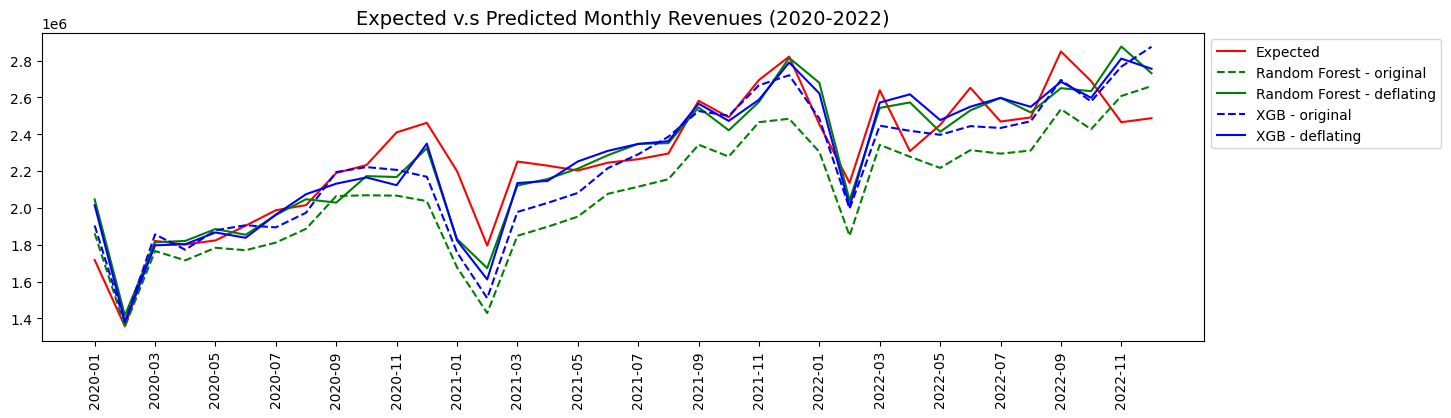

In [33]:
plotExpectedPredictedRevenues(org_data, pred_rf, pred_xgb, start_y)

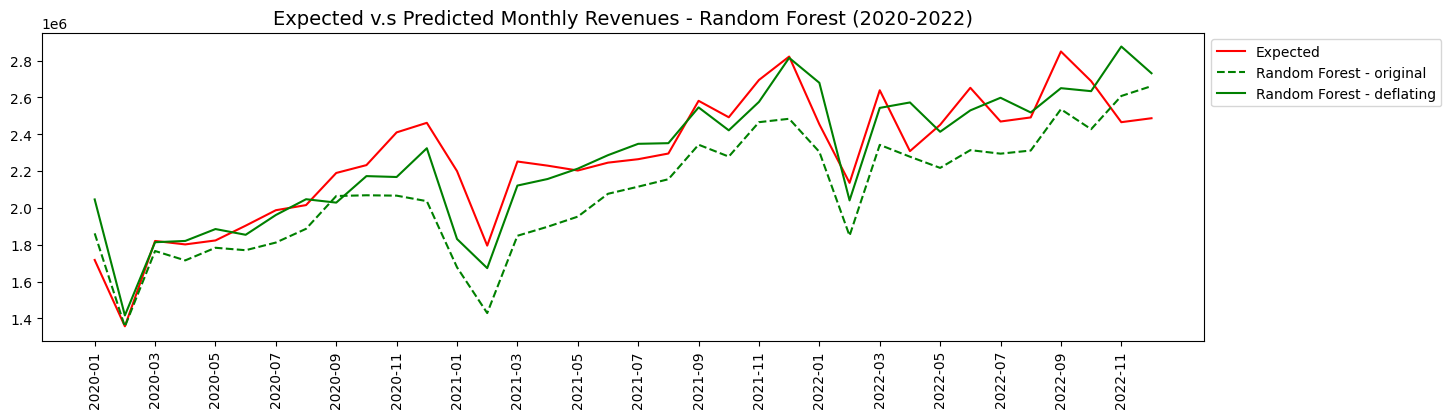

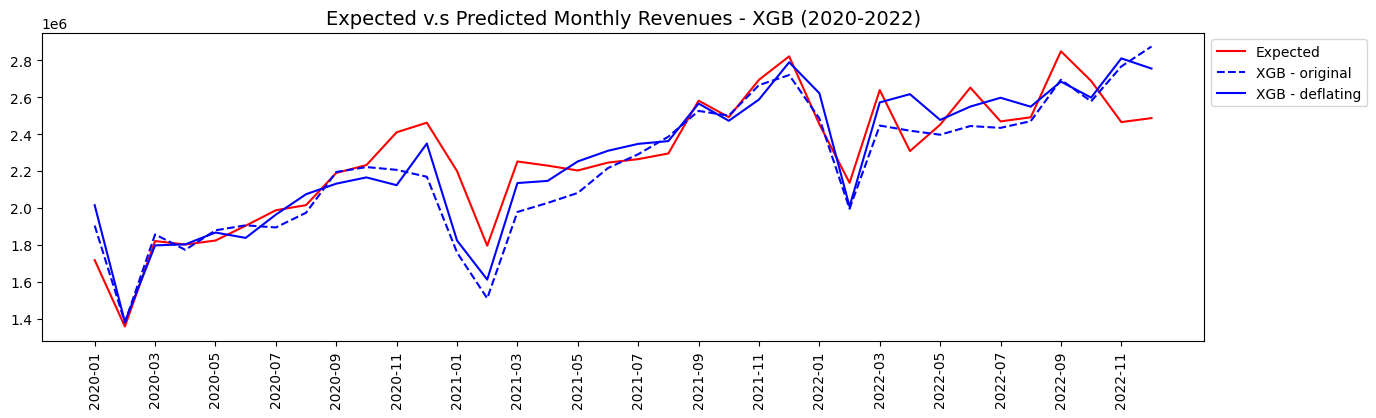

In [34]:
plotModelExpectedPredictedRevenues(org_data, pred_rf, 'rf', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_xgb, 'xgb', start_y)

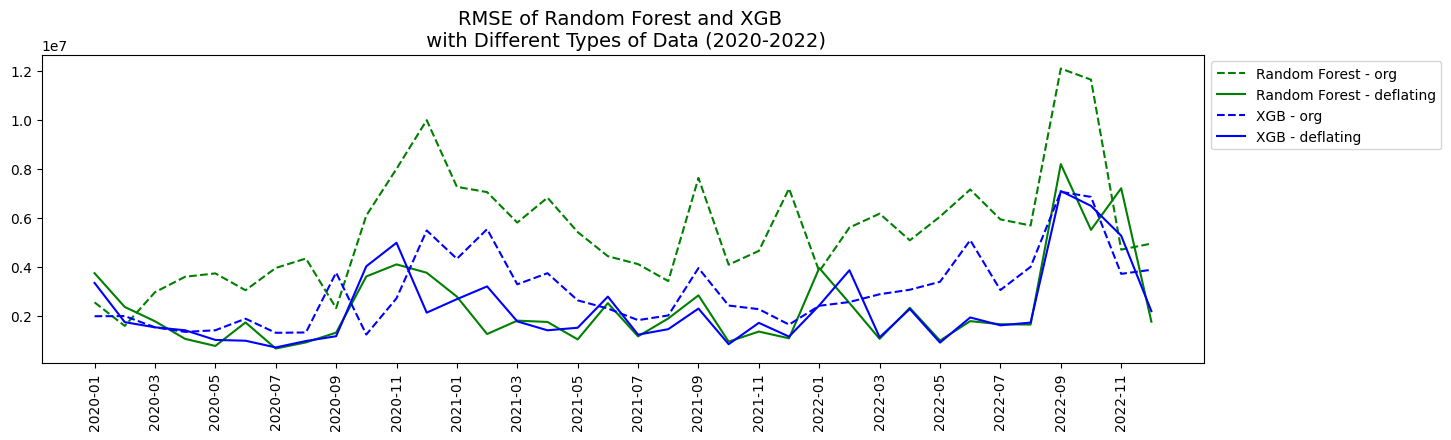

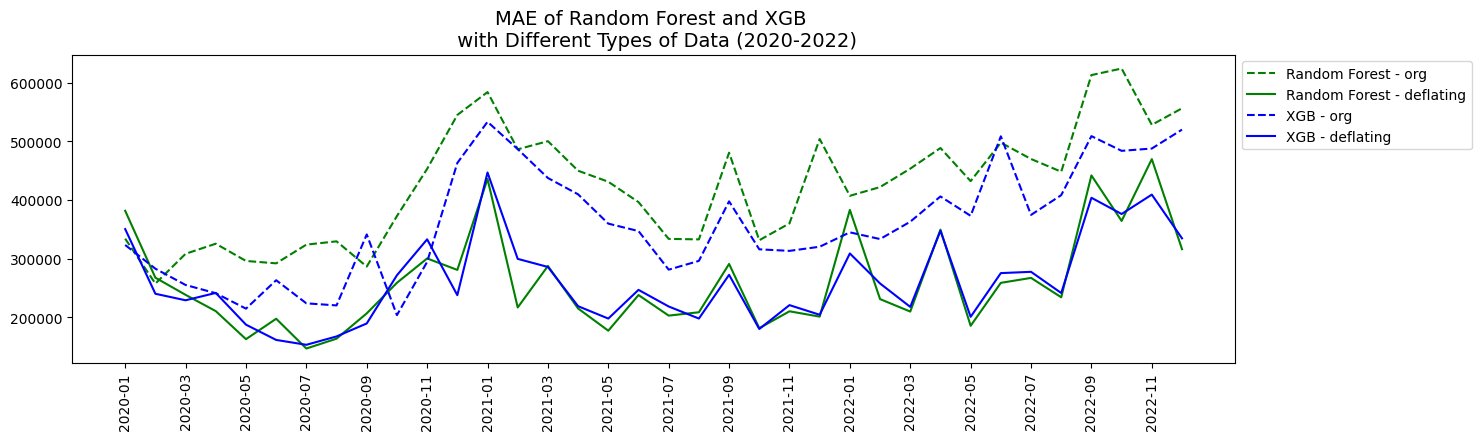

In [35]:
plotAllScores(scores_rf, scores_xgb, start_y)

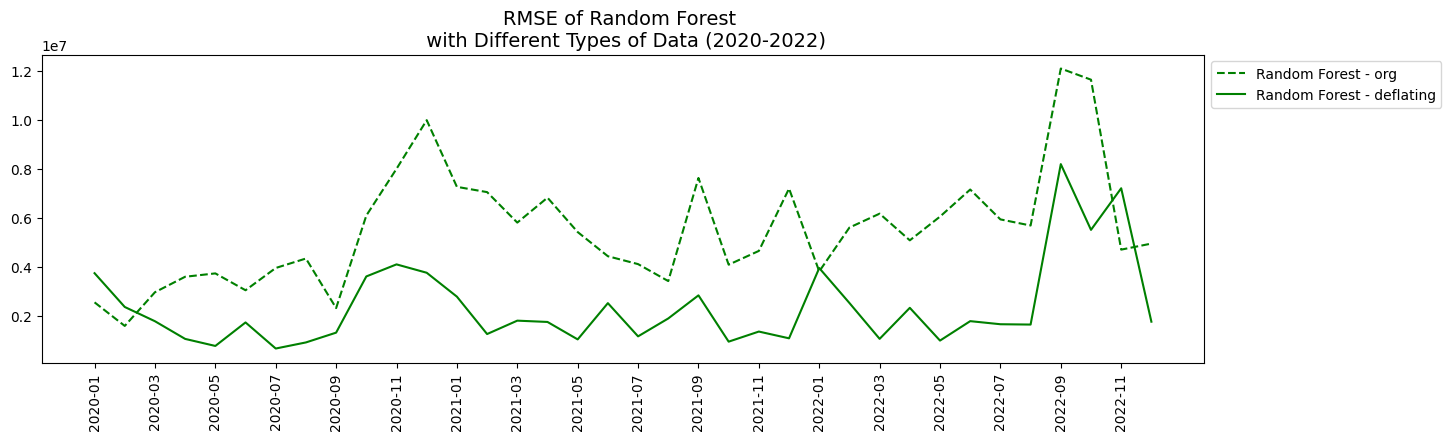

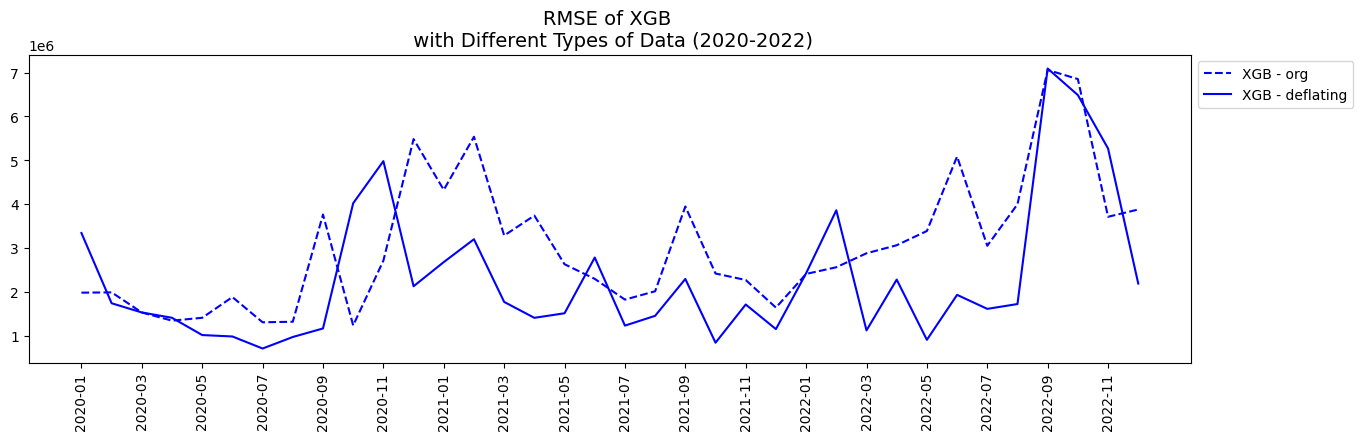

In [36]:
# RMSE
compareModelScore(scores_rf, scores_xgb, 'RMSE', start_y)  

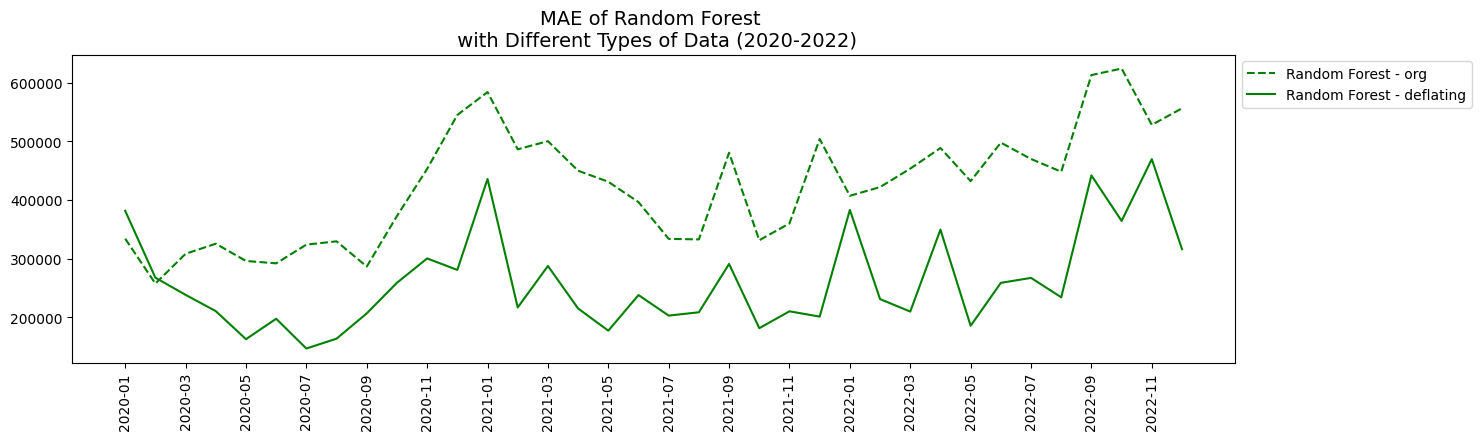

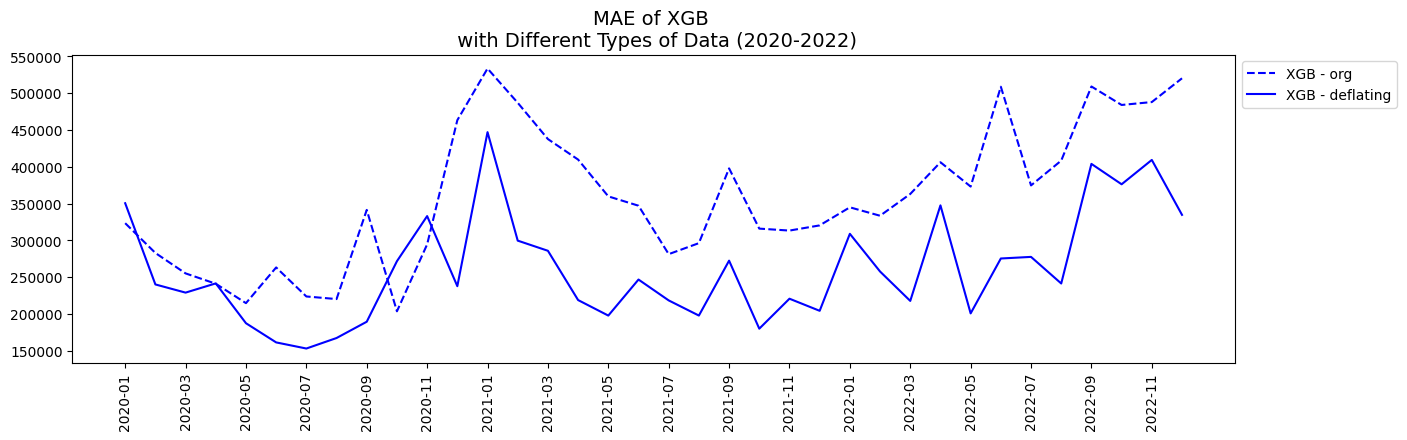

In [37]:
# MAE
compareModelScore(scores_rf, scores_xgb, 'MAE', start_y)  

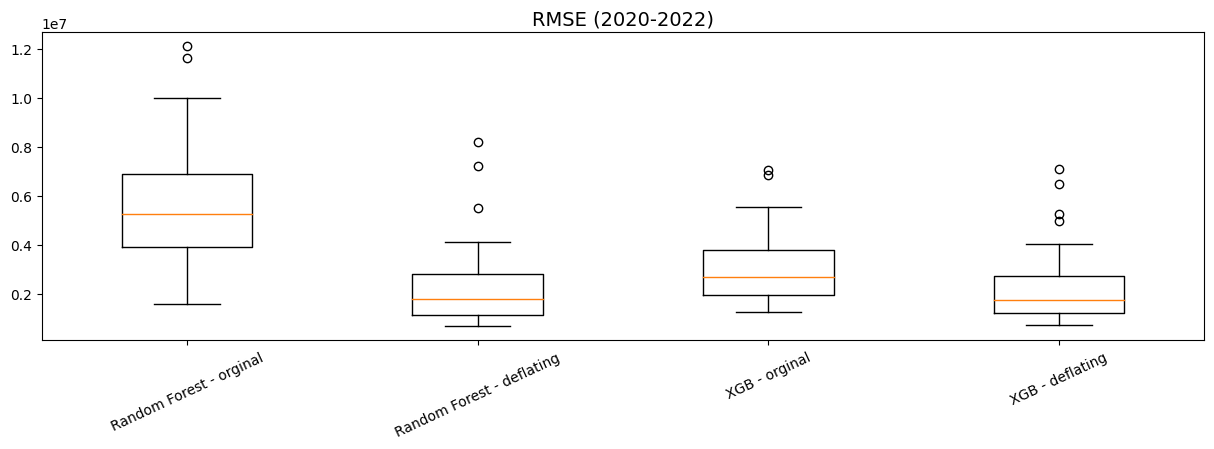

In [38]:
# RMSE
scoreBoxplotV(scores_rf, scores_xgb, 'RMSE', start_y) 

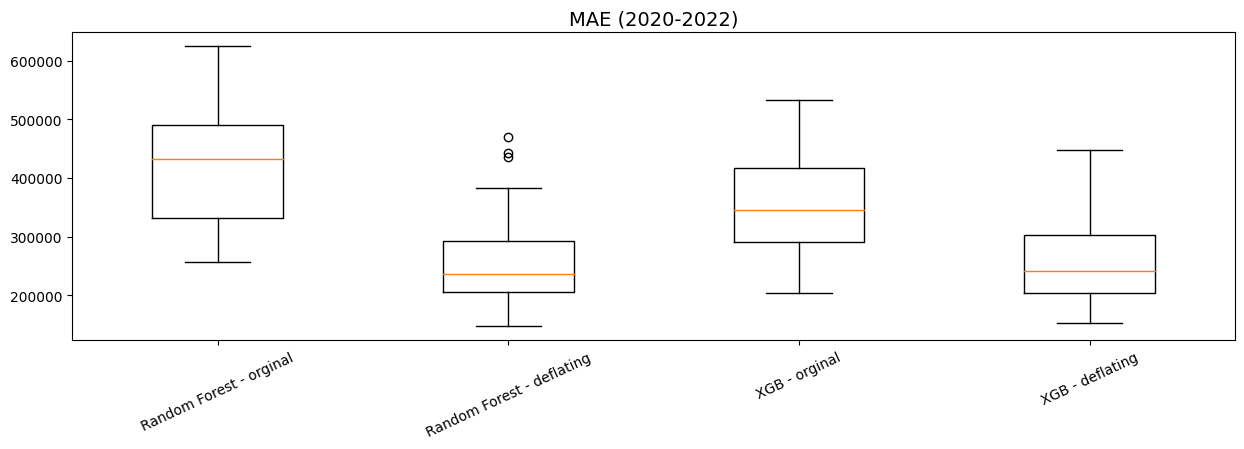

In [39]:
# MAE
scoreBoxplotV(scores_rf, scores_xgb, 'MAE', start_y)  

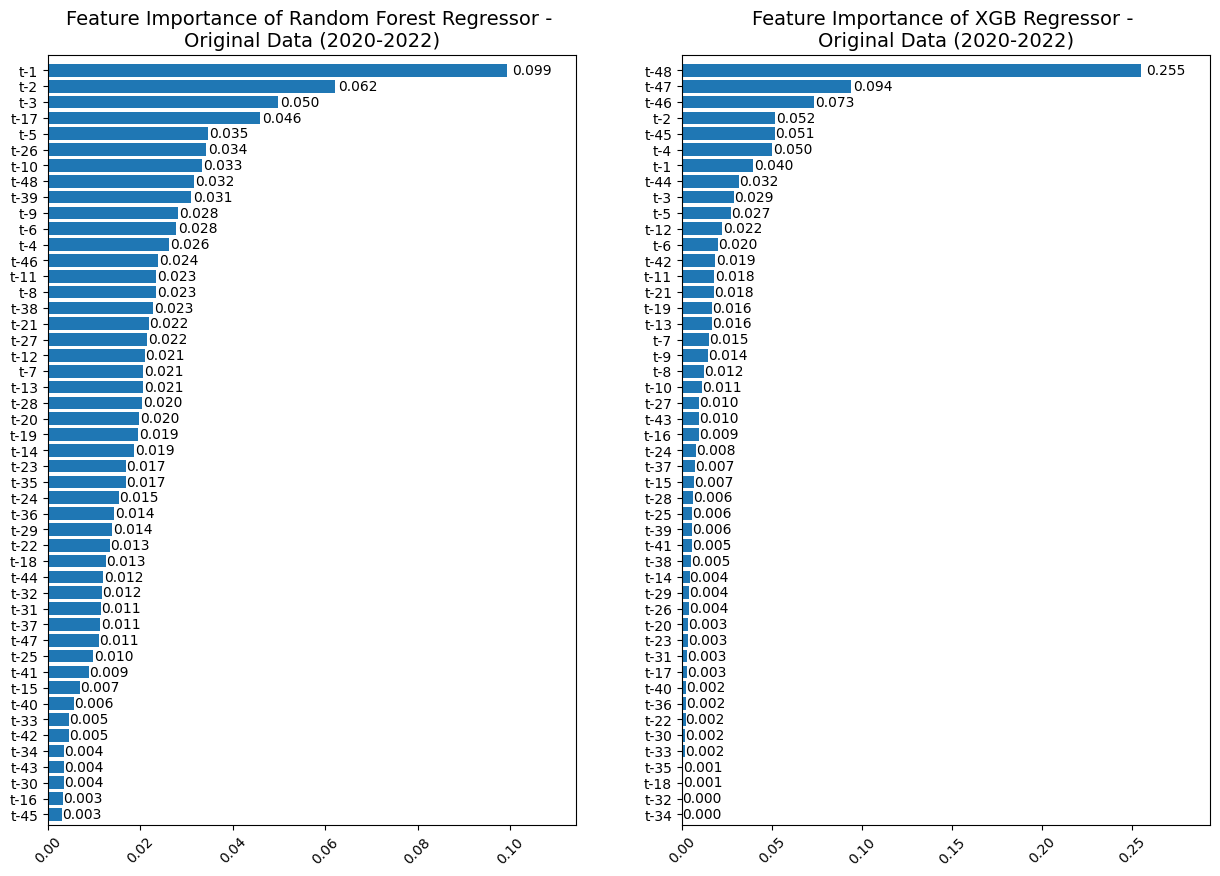

In [40]:
plotFeatureImportance(feature_importance_rf['org'], feature_importance_xgb['org'], 'org', start_y, 48)

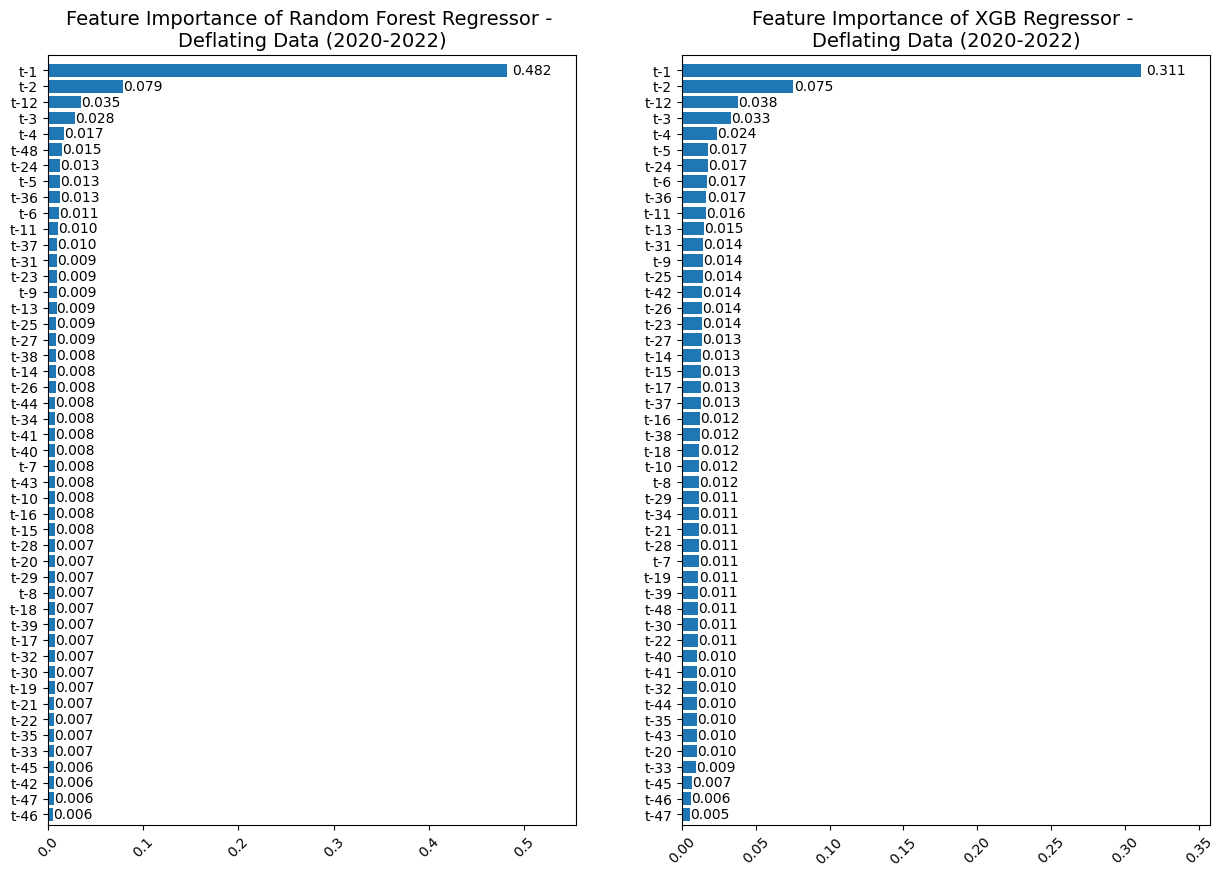

In [41]:
plotFeatureImportance(feature_importance_rf['def'], feature_importance_xgb['def'], 'def', start_y, 48)

In [42]:
class BestWorstModel():
    '''
    找出最好和最差模型。

    Attributes
    ----------
    best_rf, worst_rf: dict
        Random Forest 在各個衡量指標下最好和最差的模型。
    best_xgb, worst_xgb: dict
        XGB 在各個衡量指標下最好和最差的模型。
    best_all, worst_all: dict
        所有模型中，在各個衡量指標下最好和最差的模型。
    ----------
    best_worst_rf, best_worst_xgb: pd.DataFrame
        各資料處理方式中，預測最好和最差的月份。
    best_worst: pd.DataFrame
        各資料處理方式與模型組合中，預測最好和最差的月份。
    '''

    def __init__(self, score_rf: pd.DataFrame, score_xgb: pd.DataFrame):
        self.score_rf = score_rf
        self.score_xgb = score_xgb
        self.best_worst_rf, self.best_worst_xgb, self.best_worst = self.createBestWorstForAll()
        self.best_rf, self.worst_rf = self.findBestWorstByModel('rf')
        self.best_xgb, self.worst_xgb = self.findBestWorstByModel('xgb')
        self.best_all, self.worst_all = self.findBestWorstByModel('all')

    def createBestWorstForAll(self):
        '''
        各資料處理方式與模型組合中，預測最好和最差的月份。
        '''
        best_worst_rf = pd.DataFrame(columns = ['modelName', 'dataType', 'scoreType', 'min_month', 'min_score', 'max_month', 'max_score'])
        best_worst_xgb = pd.DataFrame(columns = ['modelName', 'dataType', 'scoreType', 'min_month', 'min_score', 'max_month', 'max_score'])

        # Random Forest
        for colName, colData in self.score_rf.items():
            best_worst_rf.loc[len(best_worst_rf)] = ['Random Forest', colName.split("-")[-1], colName.split("-")[0], colData.idxmin(), colData.min(), colData.idxmax(), colData.max()]
        # XGB
        for colName, colData in self.score_xgb.items():
            best_worst_xgb.loc[len(best_worst_xgb)] = ['XGB', colName.split("-")[-1], colName.split("-")[0], colData.idxmin(), colData.min(), colData.idxmax(), colData.max()] 
        # All
        best_worst = pd.concat([best_worst_rf, best_worst_xgb])

        # Sort by scoreType
        best_worst_rf.sort_values(by=['scoreType'])
        best_worst_xgb.sort_values(by=['scoreType'])

        return best_worst_rf, best_worst_xgb, best_worst


    def findBestWorstByModel(self, modelName: str):
        '''
        根據所選擇的模型，找出不同衡量指標下預測最好和最差的月份。

        Parameters
        ----------
        modelName: | 'rf' | 'xgb' | 'all' |

        Returns
        ----------
        best_dict: {"RMSE", "MAE"}
        worst_dict: {"RMSE", "MAE"}
        '''

        if modelName == 'rf':
            scoreD = self.best_worst_rf.copy()
        elif modelName == 'xgb':
            scoreD = self.best_worst_xgb.copy()
        elif modelName == 'all':
            scoreD = self.best_worst.copy()

        best_dict = {}
        worst_dict = {}

        scoreTypes = ['RMSE', 'MAE']
        for s in scoreTypes:
            scores = scoreD[scoreD['scoreType'] == s]   # filter
            best = scores[scores.min_score == scores.min_score.min()]
            best = best.drop(['max_month', 'max_score'], axis=1)
            best_dict[s] = best
            worst = scores[scores.max_score == scores.max_score.max()]
            worst = worst.drop(['min_month', 'min_score'], axis=1)
            worst_dict[s] = worst

        return best_dict, worst_dict


In [43]:
class BestWorstModelFeatureImportancePlot():
    '''
    Parameters
    ----------
    feature_rf, feature_xgb: Random Forest 和 XGB 在各資料處理方式下的變數重要性。
    best_rf, worst_rf: Random Forest 在各個衡量指標下最好和最差的模型。
    best_xgb, worst_xgb: Random Forest 在各個衡量指標下最好和最差的模型。
    test_year: 測試資料開始年份。

    Methods
    ----------
    plotBestWorstFeatureImportance(scoreType: str, k: int):
        scoreType: | 'RMSE' | 'MAE' |,
        k: Top k 重要變數 <= 10 (default = 5),
    '''

    def __init__(self, feature_rf: pd.DataFrame, feature_xgb: pd.DataFrame, best_rf: pd.DataFrame, worst_rf: pd.DataFrame, best_xgb: pd.DataFrame, worst_xgb: pd.DataFrame, best_all: pd.DataFrame, worst_all: pd.DataFrame, test_year: int):
        self.feature_rf = feature_rf
        self.feature_xgb = feature_xgb
        self.best_rf = best_rf
        self.worst_rf = worst_rf
        self.best_xgb = best_xgb
        self.worst_xgb = worst_xgb
        self.best_all = best_all
        self.worst_all = worst_all
        self.test_year = test_year


    def plotSingleFeatureImportance(self, feature_importance: dict, modelName: str, dataType: str, month: str, best_or_worst: str, k: int):
        '''
        畫出 best 或 worst model 的 feature importance。
        '''
        # Data Type          
        if dataType == 'org':
            name = 'Original Data'
            key1 = 'org'
        elif dataType == 'def':
            name = 'Deflating Data'
            key1 = 'def'

        feature = feature_importance[key1][month]     # 最好 or 最差模型的 feature importance              
        feature = feature.sort_values()               # 由小到大做排序
        feature = feature.iloc[-k:, ]                 # Top k

        # Plot
        if self.test_year == 2018:
            plt.title(f"Feature Importance of {modelName} {best_or_worst} Model - \n{name} ({self.test_year}-2019)", size = 14)
        elif self.test_year == 2020:
            plt.title(f"Feature Importance of {modelName} {best_or_worst} Model - \n{name} ({self.test_year}-2022)", size = 14)

        plt.barh(y = feature.index, width = feature.values, data = feature)
        for a, b in zip(range(feature.shape[0]), feature.values):
            plt.text(b*1.01, a-0.1, '%.3f' % b)
        plt.xlim([0, max(feature)*1.15])
        plt.ylim([-0.65, feature.shape[0]])
        plt.xticks(rotation = 45)


    def plotModelBestWorstFeatureImportance(self, modelName: str, dataType: list, month: list, k: int):
        '''
        畫出 Random Forest 或 XGB 最好和最差模型的 Top k 重要變數。

        Parameters
        ----------
        modelName: | 'Random Forest' | 'XGB' |,
        dataType: [最佳模型的 data type, 最差模型的 data type],
        month: [最佳模型的月份, 最差模型的月份],
        k: Top k 重要變數 <= 10 (default = 5)
        '''

        # Model
        if modelName == "Random Forest":
            feature_importance = self.feature_rf
        elif modelName == "XGB":
            feature_importance = self.feature_xgb
        
        # Plot
        plt.figure(figsize=(15,3))
        # Model - Best
        plt.subplot(1,2,1)
        self.plotSingleFeatureImportance(feature_importance, modelName, dataType[0], month[0], "Best", k)
        # Model - Worst
        plt.subplot(1,2,2)
        self.plotSingleFeatureImportance(feature_importance, modelName, dataType[1], month[1], "Worst", k)
        plt.show()


    def plotBestWorstFeatureImportance(self, scoreType: str, k: int = 5):
        '''
        畫出 Random Forest 和 XGB 最好和最差模型的 Top k 重要變數。

        Parameters
        ----------
        scoreType: | 'RMSE' | 'MAE' |,
        k: Top k 重要變數 <= 10 (default = 5),
        '''

        if k > 10:
            print("Please select a number smaller than or equal to 10 for top k.") 
        else:
            dataName_rf = [self.best_rf[scoreType].iloc[0]['dataType'], self.worst_rf[scoreType].iloc[0]['dataType']]
            dataName_xgb = [self.best_xgb[scoreType].iloc[0]['dataType'], self.worst_xgb[scoreType].iloc[0]['dataType']]
            month_rf = [self.best_rf[scoreType].iloc[0]['min_month'], self.worst_rf[scoreType].iloc[0]['max_month']]
            month_xgb = [self.best_xgb[scoreType].iloc[0]['min_month'], self.worst_xgb[scoreType].iloc[0]['max_month']]           
            # Random Forest
            self.plotModelBestWorstFeatureImportance('Random Forest', dataName_rf, month_rf, k)
            # XGB
            self.plotModelBestWorstFeatureImportance('XGB', dataName_xgb, month_xgb, k)


In [44]:
bw = BestWorstModel(scores_rf, scores_xgb)

In [45]:
imp_plot = BestWorstModelFeatureImportancePlot(feature_importance_rf, feature_importance_xgb, bw.best_rf, bw.worst_rf, bw.best_xgb, bw.worst_xgb, bw.best_all, bw.worst_all, start_y)
top_k = 5

In [46]:
# Random Forest
bw.best_rf['RMSE']

,modelName,dataType,scoreType,min_month,min_score
2,Random Forest,def,RMSE,2020-07,659573.0


In [47]:
# XGB
bw.best_xgb['RMSE']

,modelName,dataType,scoreType,min_month,min_score
2,XGB,def,RMSE,2020-07,703651.0


In [48]:
# Random Forest
bw.worst_rf['RMSE']

,modelName,dataType,scoreType,max_month,max_score
0,Random Forest,org,RMSE,2022-09,12096525.0


In [49]:
# XGB
bw.worst_xgb['RMSE']

,modelName,dataType,scoreType,max_month,max_score
2,XGB,def,RMSE,2022-09,7093180.0


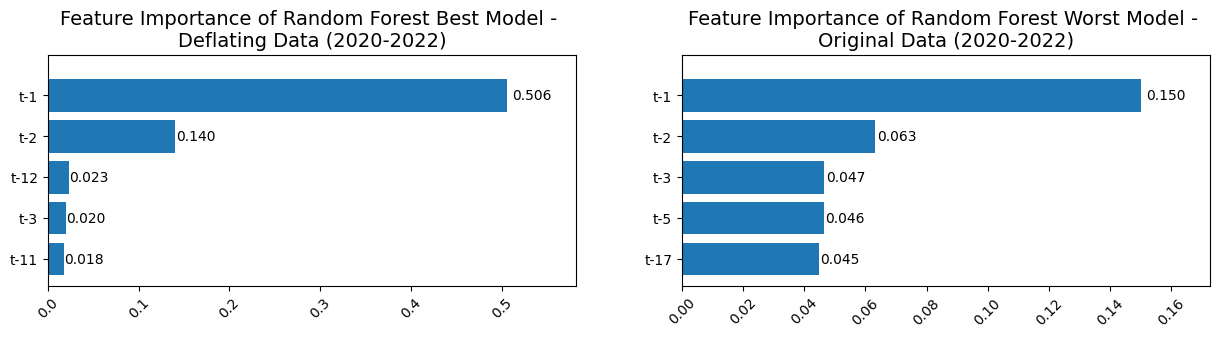

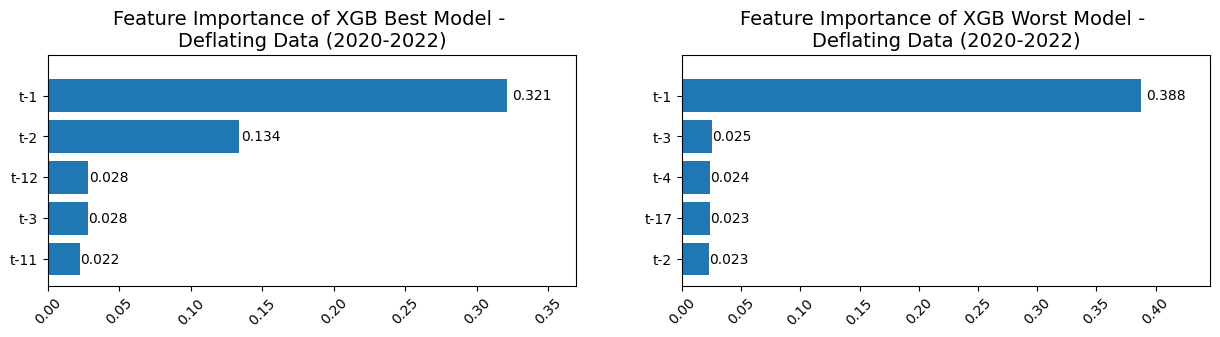

In [50]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k)

In [51]:
# Random Forest
bw.best_rf['MAE']

,modelName,dataType,scoreType,min_month,min_score
3,Random Forest,def,MAE,2020-07,146709.0


In [52]:
# XGB
bw.best_xgb['MAE']

,modelName,dataType,scoreType,min_month,min_score
3,XGB,def,MAE,2020-07,153066.0


In [53]:
# Random Forest
bw.worst_rf['MAE']

,modelName,dataType,scoreType,max_month,max_score
1,Random Forest,org,MAE,2022-10,624279.0


In [54]:
# XGB
bw.worst_xgb['MAE']

,modelName,dataType,scoreType,max_month,max_score
1,XGB,org,MAE,2021-01,533372.0


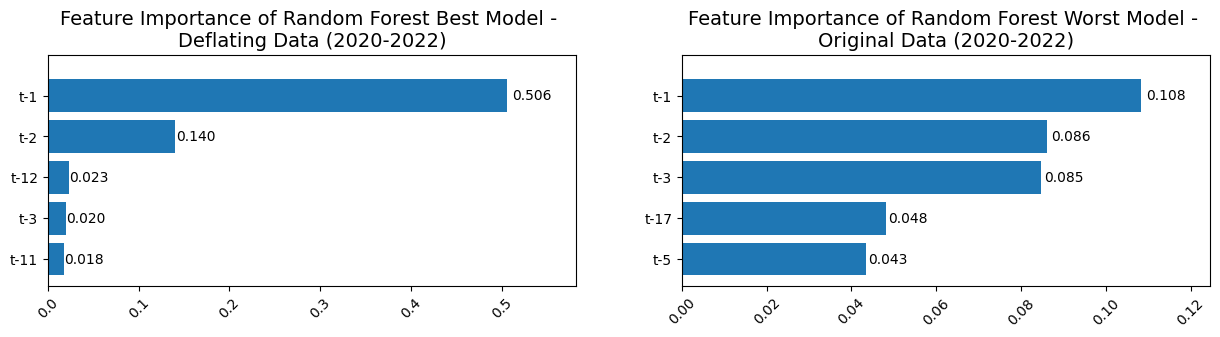

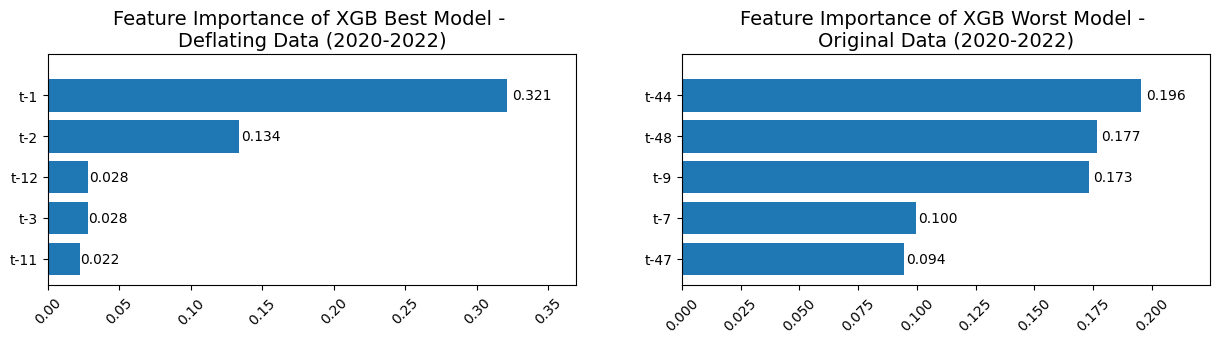

In [55]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k)


## **第二部分：鎖定產業進行預測，並分析預測結果**

1. 自行挑選一個產業類型，討論其月營收金額的預測結果。產業範圍可以自行界定，如電子業、半導體業等皆可，各公司所屬 TSE 產業可參考附件「TSE industry.xlsx」（若選擇的產業為多個 TSE 產業類別組成的大產業，請在書面中以文字簡單說明如何定義）
2. 使用之模型可由 Random Forest 和 XGBoost 中選擇一個，或是兩個都使用，訓練後報導其成效
3. 預測之時間範圍同第一部分（2020/1 至 2022/12）

＊ 決定資料是否進行平減、如何進行平減，也是你實驗設計中的一環！<br>
＊ 產業選擇請試著以程式碼做篩選，不接受自行新建 Excel 檔

In [58]:
industry = pd.read_excel(os.path.join(project_path, 'TSE industry.xlsx'))
display(industry)

,公司簡稱,TSE 產業別,TSE新產業_名稱
0,1101 台泥,1,水泥工業
1,1102 亞泥,1,水泥工業
2,1103 嘉泥,1,水泥工業
3,1104 環泥,1,水泥工業
4,1108 幸福,1,水泥工業
...,...,...,...
1783,9949 琉園,32,文化創意業
1784,9950 萬國通,3,塑膠工業
1785,9951 皇田,5,電機機械
1786,9960 邁達康,18,貿易百貨


In [59]:
# 分析半導體業
company_list = industry[(industry['TSE新產業_名稱'] == '半導體')]['公司簡稱'].tolist()
company_filter = org_data.index.isin(company_list)
org_data = org_data.loc[company_filter,:]
display(org_data)

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
2302 麗正,32323,38937,63530,56392,63172,53532,52372,49822,55125,49190,...,68638,73724,65387,74530,81749,81810,80543,85579,83652,54578
2303 聯電,9452116,8730655,9598645,10280727,10863111,10760866,11557852,10998405,10850515,10467850,...,22140452,22796461,24433030,24825649,24826685,25346076,25218828,24344264,22545442,20946009
2329 華泰,811872,650908,791498,827292,752354,666011,855143,816559,818219,800820,...,1496740,1462314,1413069,1412836,1313341,1327389,1168206,1195847,1239696,1172398
2330 台積電,47438687,41182084,44134225,50070645,51787926,54027749,52103384,55091177,55382473,51794813,...,171966525,172561382,185705425,175874001,186762689,218132391,208247663,210265633,222705993,192560242
2337 旺宏,1634437,1315314,1455039,1811814,1639042,1779787,1805327,2525116,2377816,2286434,...,4256653,3879228,3548418,3912403,3604068,3727862,4139594,3730395,2765340,2582192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227 巨有科技,13732,10712,78725,15388,24419,17002,23119,21068,18879,18266,...,65200,177363,58257,69207,60818,45411,126400,123437,76888,42847
8261 富鼎,190469,123948,172033,162011,167754,156559,181700,185291,158851,174936,...,404370,327677,437243,398320,333983,287845,288271,253439,239214,213534
8271 宇瞻,804778,508477,796285,852122,797902,789587,973546,783425,988308,906131,...,759685,729186,637906,745768,674479,698115,872632,821615,704886,608988


In [60]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (129, 120)
Data size: 15480


In [61]:
start_y = 2020
start_m = 1
end_y = 2022
end_m = 12

In [62]:
# 訓練與預測 (12 min.)
pred_rf, feature_importance_rf, scores_rf = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'rf')

Using time: 127.912  secs.


In [63]:
# 原始資料的預測金額
pred_rf['org'].head(4)

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
2302 麗正,35237.0,28513.0,38965.0,39577.0,42920.0,44410.0,46349.0,45457.0,45481.0,51295.0,...,79332.0,86117.0,75216.0,79506.0,79134.0,81757.0,87698.0,98095.0,91480.0,77695.0
2303 聯電,10831660.0,9443311.0,9728809.0,11272125.0,11472917.0,10922425.0,12363725.0,12186624.0,11086237.0,13042143.0,...,19408315.0,18224379.0,18692236.0,20428944.0,19912115.0,18966568.0,19407241.0,19960726.0,22143455.0,22575762.0
2329 華泰,1416361.0,1119302.0,1370306.0,1284876.0,1377436.0,1445561.0,1547816.0,1490461.0,1424820.0,1489504.0,...,1618863.0,1773760.0,1666972.0,1643117.0,1724833.0,1673536.0,1563766.0,1585618.0,1442402.0,1462754.0
2330 台積電,51573827.0,40742517.0,53820109.0,50868960.0,53702165.0,57258840.0,56800160.0,69923020.0,67439300.0,69787078.0,...,88095195.0,76776496.0,78607617.0,101495762.0,85775596.0,93949193.0,104195303.0,91117315.0,101086673.0,105621811.0


In [64]:
# 平減資料的預測金額
pred_rf['def'].head(4)

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
2302 麗正,41950.0,33505.0,38374.0,36914.0,46321.0,34505.0,45090.0,57381.0,58856.0,58896.0,...,86426.0,68854.0,74104.0,67102.0,77109.0,81076.0,83088.0,83344.0,88610.0,84620.0
2303 聯電,13654113.0,11284716.0,13874279.0,14215516.0,15039877.0,14338400.0,14864731.0,15938332.0,15174412.0,15078620.0,...,22310742.0,22070710.0,23390365.0,24903093.0,26939535.0,25571750.0,25495695.0,24276709.0,24977395.0,24074570.0
2329 華泰,1347001.0,1157000.0,1274633.0,1325725.0,1259069.0,1126143.0,1196863.0,1096403.0,1160915.0,1259854.0,...,1430607.0,1439494.0,1412053.0,1422264.0,1429509.0,1362071.0,1349375.0,1219616.0,1234642.0,1387441.0
2330 台積電,96892298.0,78810828.0,100388311.0,106539287.0,99362472.0,97135368.0,115164091.0,105878538.0,116241038.0,116260229.0,...,178144645.0,177198945.0,180892871.0,196217167.0,187353173.0,193182436.0,205861911.0,193581563.0,206684957.0,223317107.0


In [65]:
# 預測分數
scores_rf.head(4)

,RMSE-org,MAE-org,RMSE-def,MAE-def
2020-01,4636942.0,567638.0,619134.0,124859.0
2020-02,4693902.0,614155.0,1331924.0,268321.0
2020-03,5309948.0,670954.0,1177153.0,195131.0
2020-04,4012165.0,516132.0,957499.0,174079.0


In [66]:
# 訓練與預測 (25 min. with GPU)
pred_xgb, feature_importance_xgb, scores_xgb = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'xgb')

Using time: 287.363  secs.


In [67]:
# 原始資料的預測金額
pred_xgb['org'].head(4)

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
2302 麗正,33670.0,22386.0,33851.0,40732.0,41688.0,34957.0,41878.0,48409.0,47291.0,53533.0,...,85070.0,113906.0,68301.0,82744.0,83878.0,82160.0,84404.0,101383.0,79605.0,78537.0
2303 聯電,11796064.0,10461740.0,10325473.0,12081934.0,12241737.0,11706169.0,13727591.0,13183650.0,10825522.0,14586778.0,...,16619550.0,16382059.0,17189068.0,17336606.0,18366116.0,18789990.0,18750566.0,19158232.0,19661422.0,20279578.0
2329 華泰,1344640.0,1100702.0,1263207.0,1079196.0,1203565.0,1535393.0,1671873.0,1866498.0,1711870.0,1772308.0,...,1461996.0,1578986.0,1598328.0,1583603.0,1552833.0,1613201.0,1648162.0,1515541.0,1384385.0,1363841.0
2330 台積電,78091752.0,60889040.0,79719432.0,74691600.0,80434112.0,85865648.0,84754760.0,106113896.0,102166512.0,106035816.0,...,129127360.0,111314752.0,112359632.0,148470592.0,124557760.0,137427104.0,152685344.0,134535824.0,148267520.0,155382144.0


In [68]:
# 平減資料的預測金額
pred_xgb['def'].head(4)

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
2302 麗正,37956.0,36879.0,40547.0,33419.0,44233.0,33735.0,47635.0,85210.0,57208.0,53802.0,...,98825.0,70617.0,69665.0,65062.0,76598.0,82860.0,78511.0,81885.0,90603.0,84700.0
2303 聯電,13374445.0,11785065.0,14243372.0,13793409.0,15005370.0,14299634.0,14808402.0,16134967.0,15112573.0,15008152.0,...,20673804.0,23510481.0,24391144.0,26133810.0,26497936.0,25908853.0,25198255.0,22775363.0,24940443.0,24131613.0
2329 華泰,1387145.0,1286497.0,1317025.0,1403923.0,1234738.0,1118824.0,1213127.0,1027813.0,1187728.0,1220663.0,...,1451509.0,1407779.0,1404000.0,1475816.0,1451799.0,1307422.0,1297623.0,1151005.0,1364973.0,1387677.0
2330 台積電,92781534.0,102940469.0,104567280.0,100903623.0,98729344.0,97335370.0,114699265.0,101927412.0,119664973.0,114765650.0,...,181167620.0,180902928.0,182044283.0,200487958.0,185247899.0,191840587.0,193183950.0,196722867.0,212415835.0,236201361.0


In [69]:
# 預測分數
scores_xgb.head(4)

,RMSE-org,MAE-org,RMSE-def,MAE-def
2020-01,2291966.0,327339.0,1004784.0,174176.0
2020-02,2907180.0,423230.0,1023371.0,263518.0
2020-03,3013873.0,420012.0,813147.0,157060.0
2020-04,1911067.0,299010.0,494299.0,139944.0


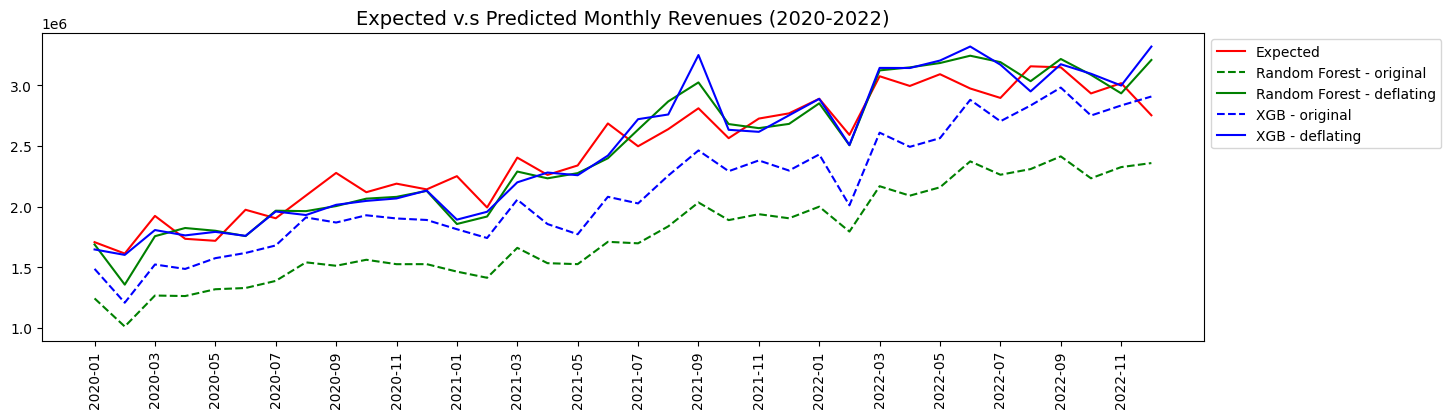

In [70]:
plotExpectedPredictedRevenues(org_data, pred_rf, pred_xgb, start_y)

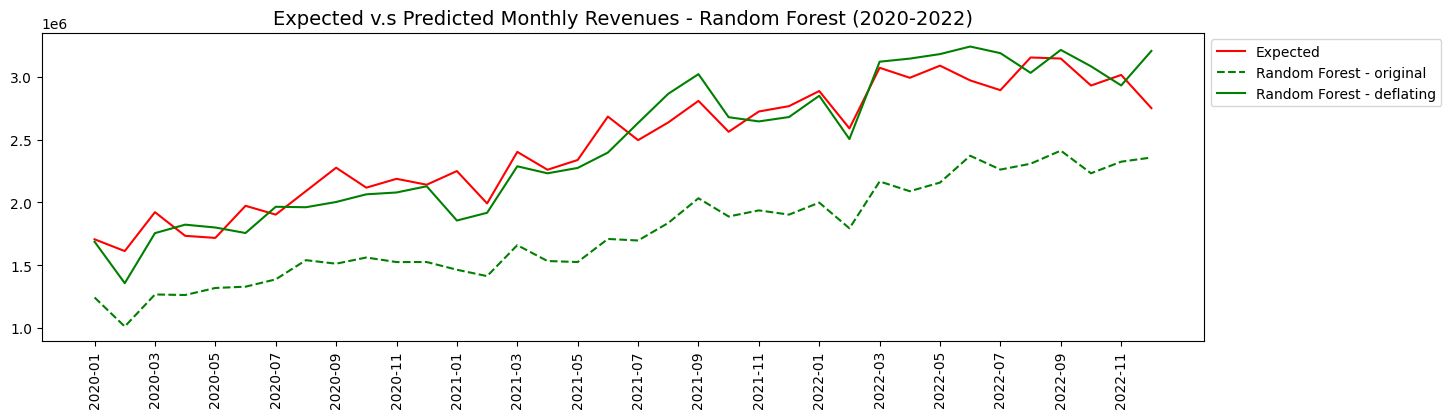

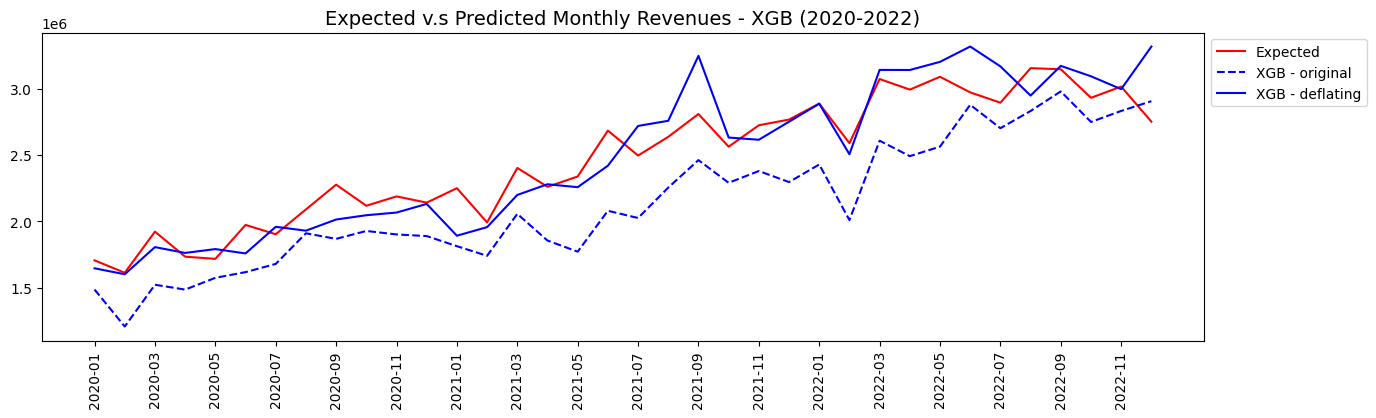

In [71]:
plotModelExpectedPredictedRevenues(org_data, pred_rf, 'rf', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_xgb, 'xgb', start_y)

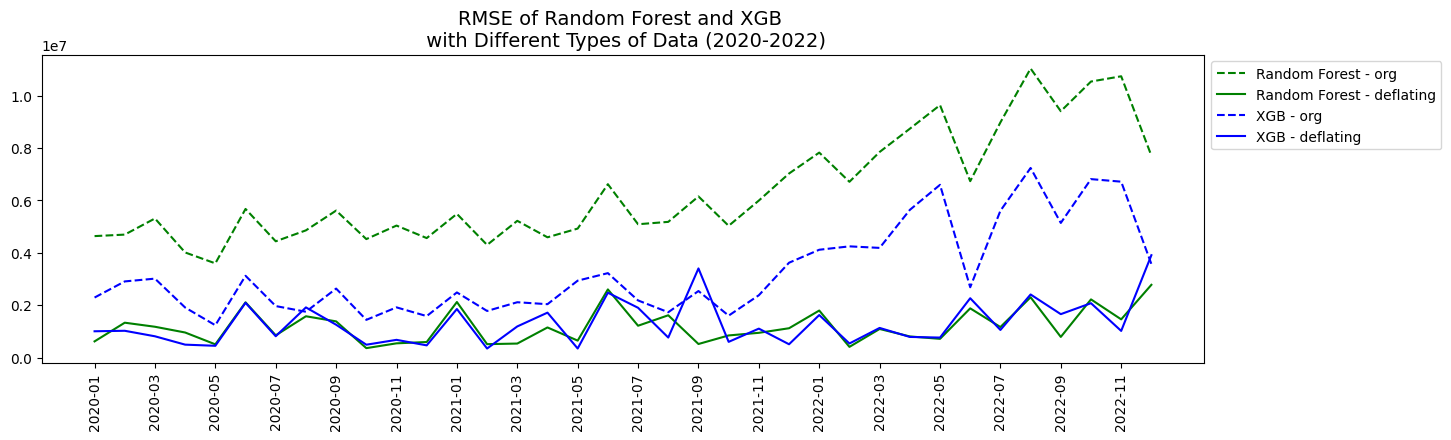

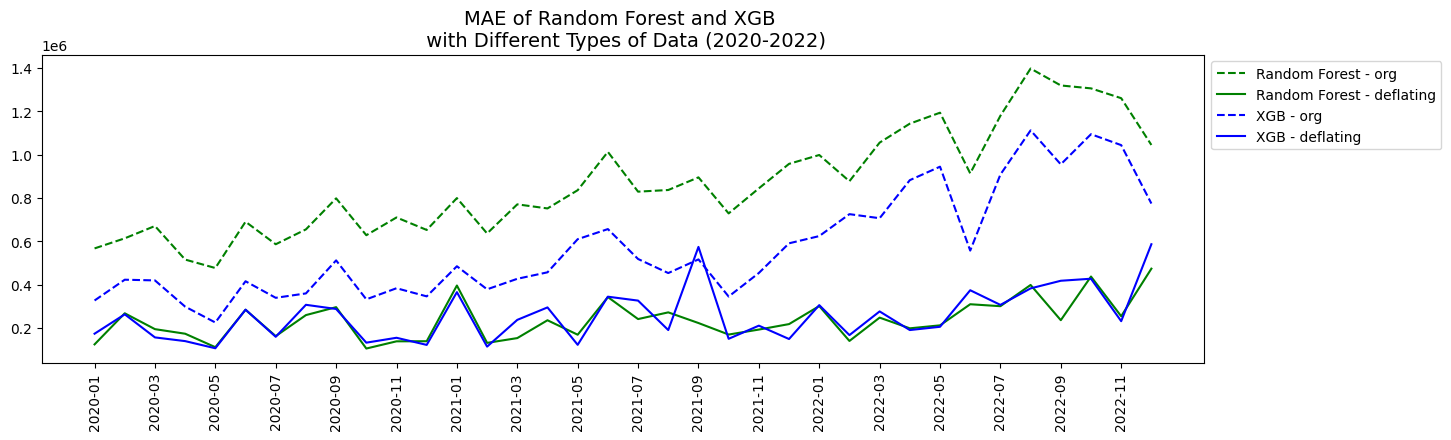

In [72]:
plotAllScores(scores_rf, scores_xgb, start_y)

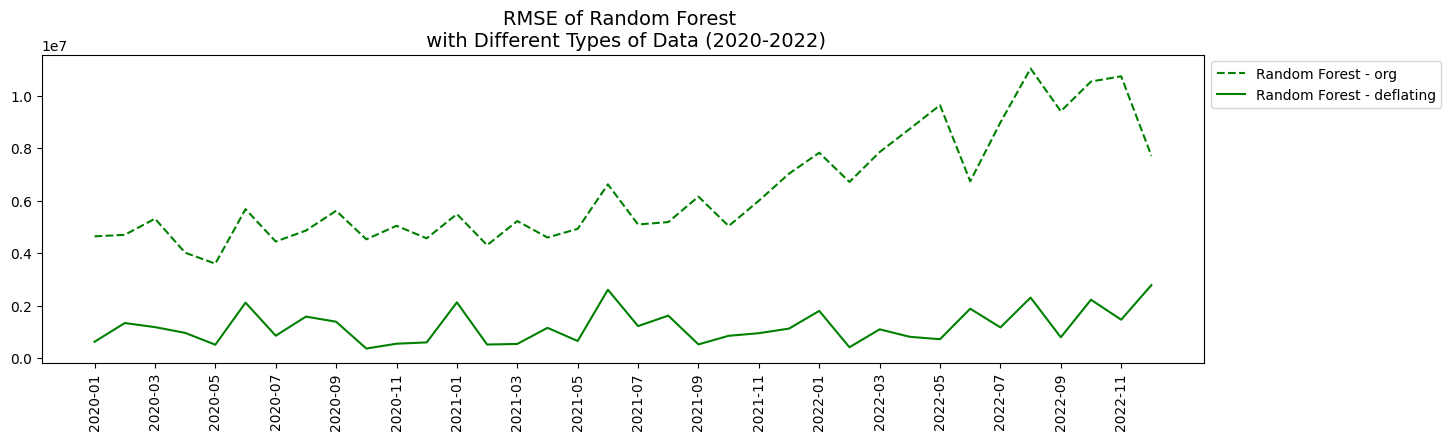

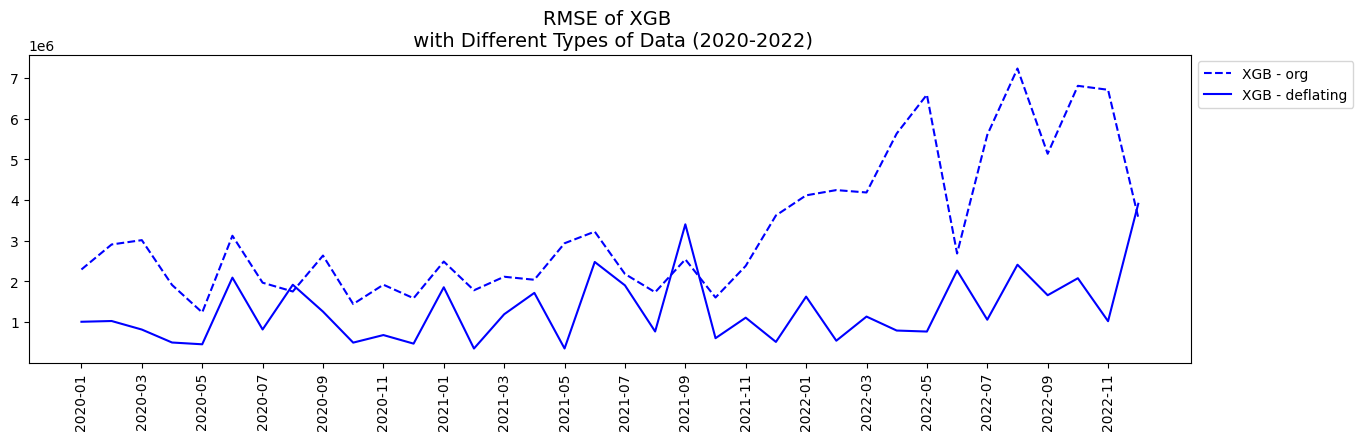

In [73]:
# RMSE
compareModelScore(scores_rf, scores_xgb, 'RMSE', start_y)  

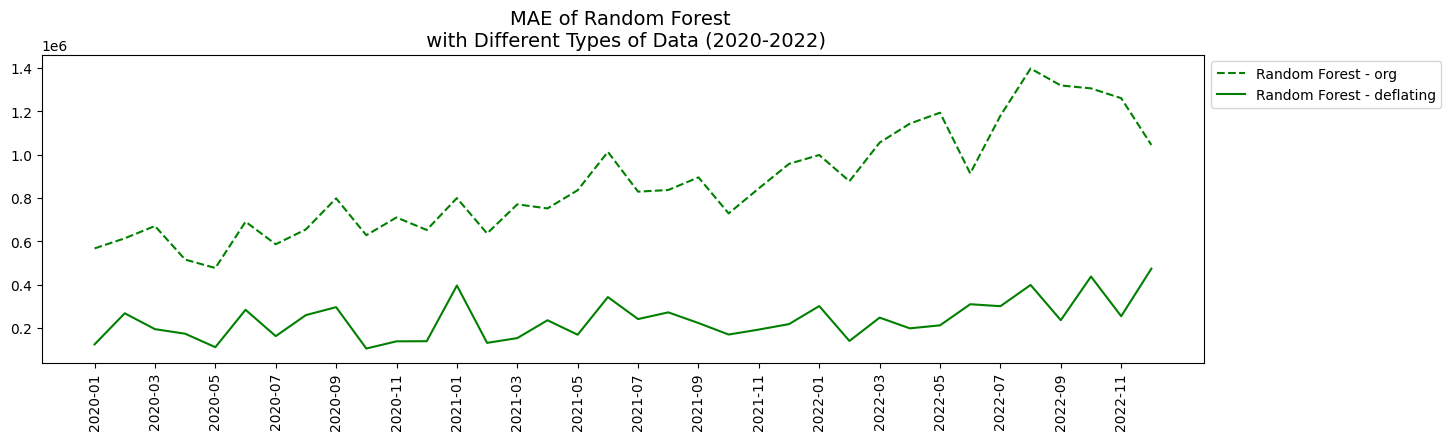

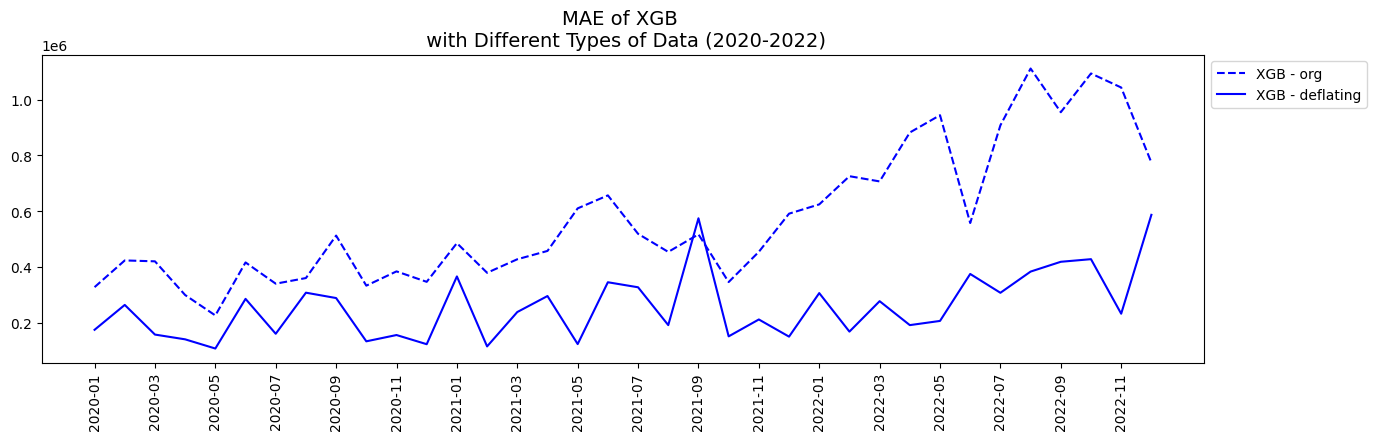

In [74]:
# MAE
compareModelScore(scores_rf, scores_xgb, 'MAE', start_y)  

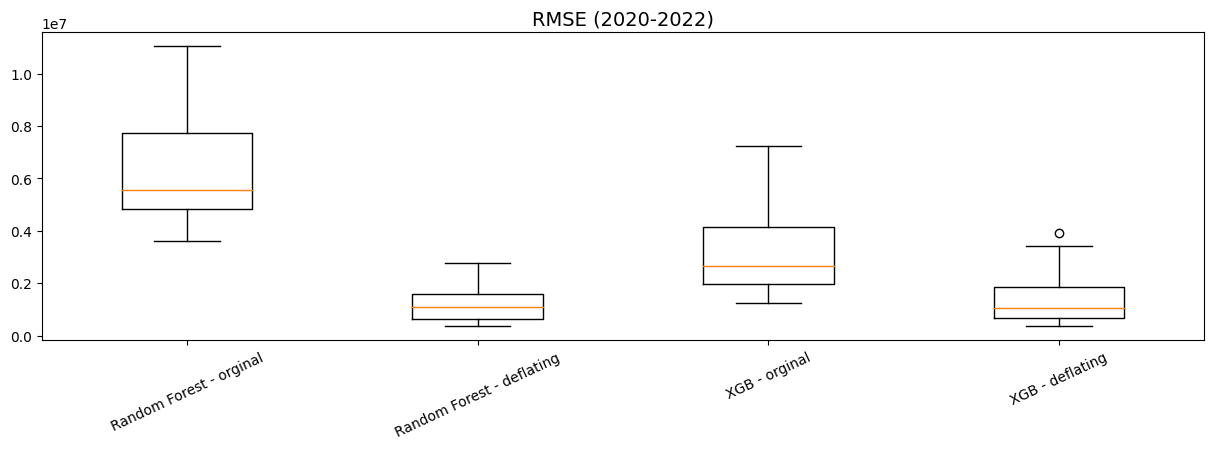

In [75]:
# RMSE
scoreBoxplotV(scores_rf, scores_xgb, 'RMSE', start_y)

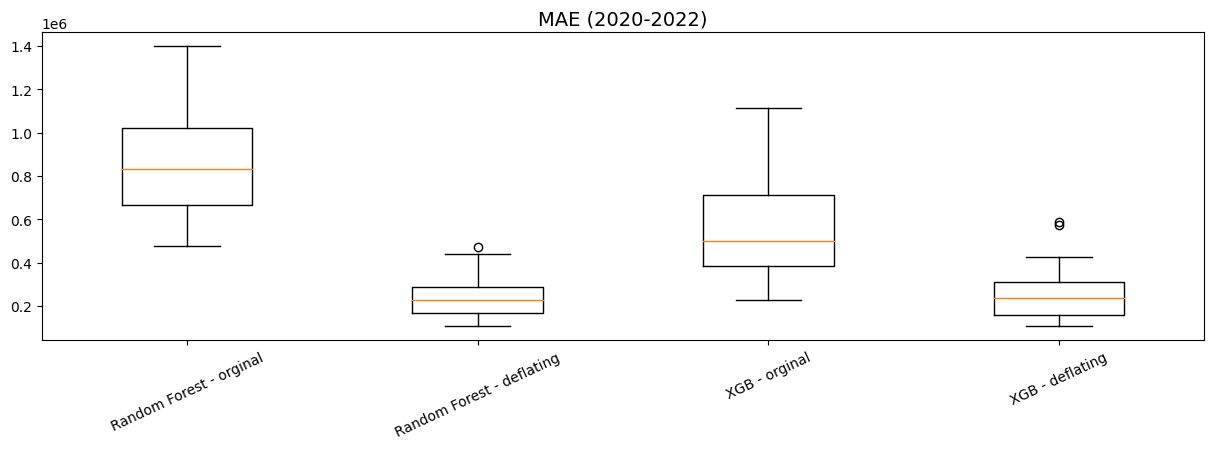

In [76]:
# MAE
scoreBoxplotV(scores_rf, scores_xgb, 'MAE', start_y) 

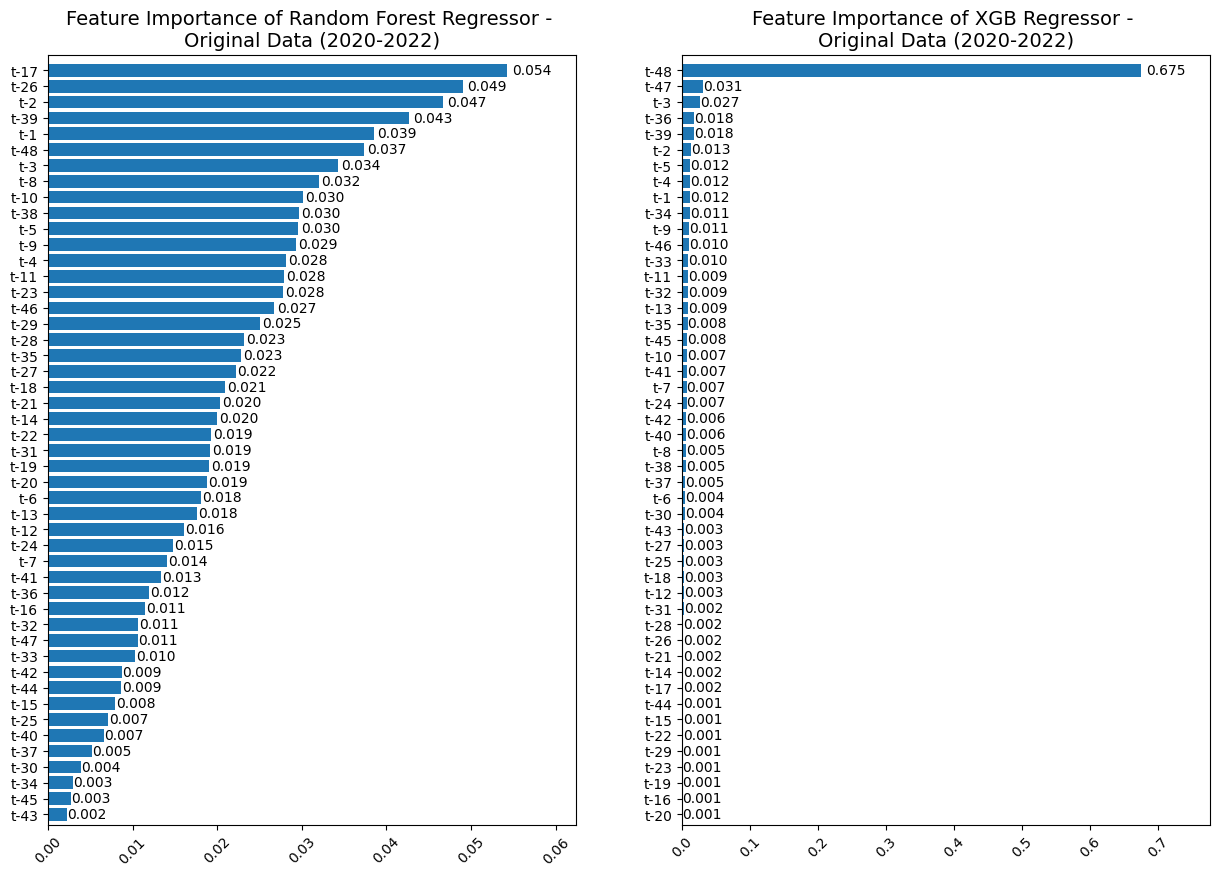

In [77]:
plotFeatureImportance(feature_importance_rf['org'], feature_importance_xgb['org'], 'org', start_y, 48)

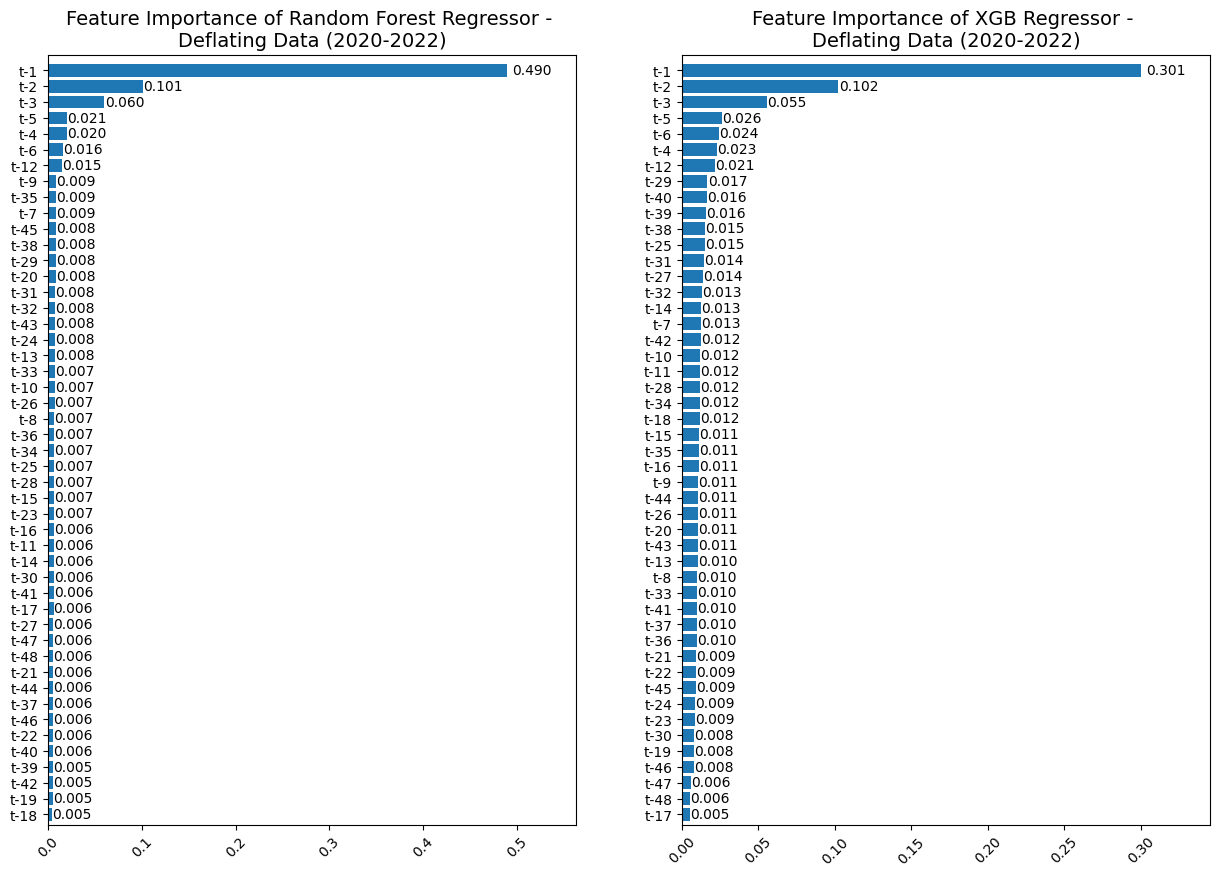

In [78]:
plotFeatureImportance(feature_importance_rf['def'], feature_importance_xgb['def'], 'def', start_y, 48)

In [79]:
bw = BestWorstModel(scores_rf, scores_xgb)

In [80]:
imp_plot = BestWorstModelFeatureImportancePlot(feature_importance_rf, feature_importance_xgb, bw.best_rf, bw.worst_rf, bw.best_xgb, bw.worst_xgb, bw.best_all, bw.worst_all, start_y)
top_k = 5

In [81]:
# Random Forest
bw.best_rf['RMSE']

,modelName,dataType,scoreType,min_month,min_score
2,Random Forest,def,RMSE,2020-10,360937.0


In [82]:
# XGB
bw.best_xgb['RMSE']

,modelName,dataType,scoreType,min_month,min_score
2,XGB,def,RMSE,2021-02,346136.0


In [83]:
# Random Forest
bw.worst_rf['RMSE']

,modelName,dataType,scoreType,max_month,max_score
0,Random Forest,org,RMSE,2022-08,11032456.0


In [84]:
# XGB
bw.worst_xgb['RMSE']

,modelName,dataType,scoreType,max_month,max_score
0,XGB,org,RMSE,2022-08,7237574.0


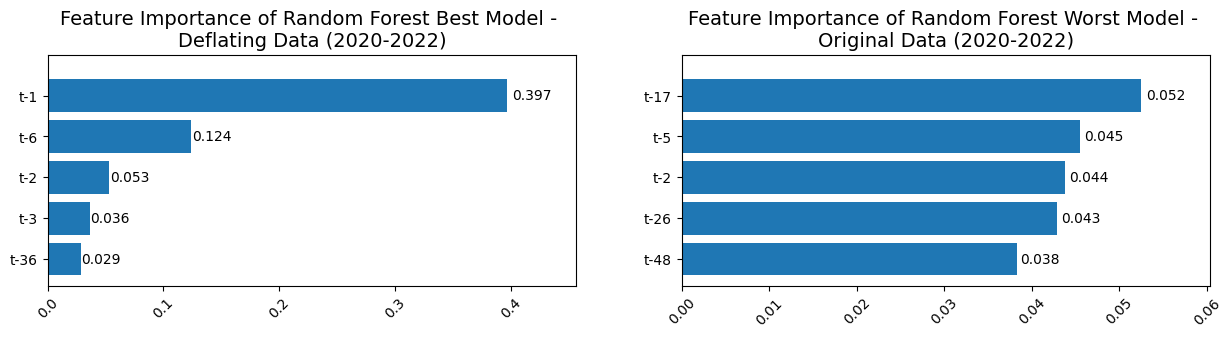

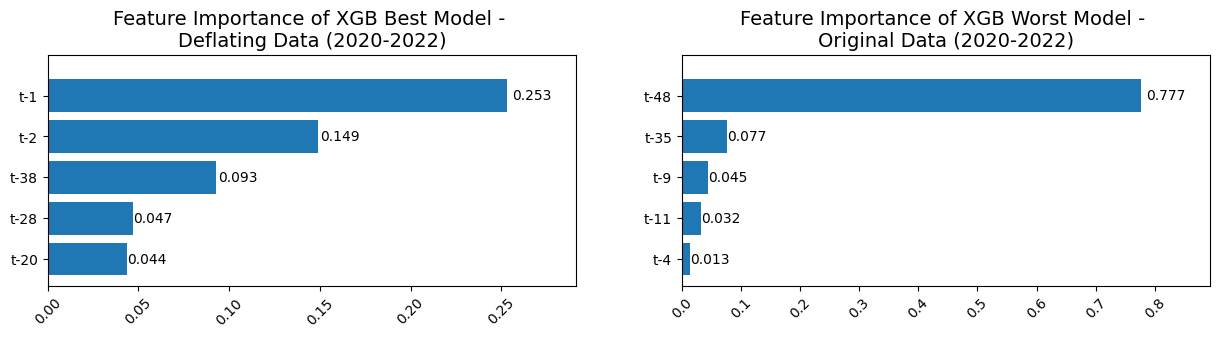

In [85]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k)

In [86]:
# Random Forest
bw.best_rf['MAE']

,modelName,dataType,scoreType,min_month,min_score
3,Random Forest,def,MAE,2020-10,105756.0


In [87]:
# XGB
bw.best_xgb['MAE']

,modelName,dataType,scoreType,min_month,min_score
3,XGB,def,MAE,2020-05,106951.0


In [88]:
# Random Forest
bw.worst_rf['MAE']

,modelName,dataType,scoreType,max_month,max_score
1,Random Forest,org,MAE,2022-08,1397442.0


In [89]:
# XGB
bw.worst_xgb['MAE']

,modelName,dataType,scoreType,max_month,max_score
1,XGB,org,MAE,2022-08,1112214.0


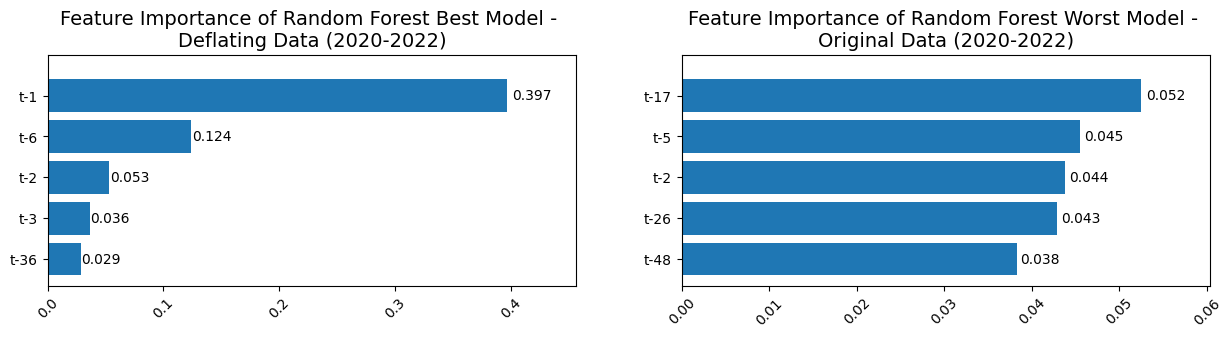

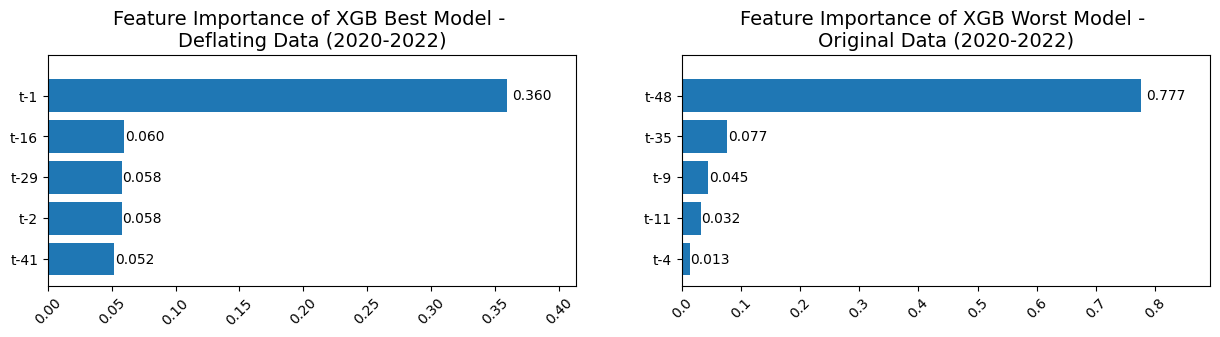

In [90]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k)